# Analysis on Lending Club Case Study

# Step1 : Importing important Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os 
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [4]:
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_columns', 150)
pd.options.display.float_format = '{:2f}'.format

## Step 2: Load data set

In [5]:
file_to_read = os.getcwd() + '\loan.csv'
df = pd.read_csv(file_to_read, low_memory=False)
df.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.000000,36 months,10.65%,162.870000,B,B2,NaN,10+ years,RENT,24000.000000,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.650000,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.000000,0.000000,5863.155187,5833.840000,5000.000000,863.160000,0.000000,0.000000,0.000000,Jan-15,171.620000,NaN,May-16,0.000000,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.000000,60 months,15.27%,59.830000,C,C4,Ryder,< 1 year,RENT,30000.000000,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.000000,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.000000,0.000000,1008.710000,1008.710000,456.460000,435.170000,0.000000,117.080000,1.110000,Apr-13,119.660000,NaN,Sep-13,0.000000,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN


## Understanding data and variables

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [78]:
df.shape

(39717, 111)

Total 111 columns are present in dataset and 39717 values

Printing all columns

In [79]:
for columns in df.columns:
    print(columns)

id
member_id
loan_amnt
funded_amnt
funded_amnt_inv
term
int_rate
installment
grade
sub_grade
emp_title
emp_length
home_ownership
annual_inc
verification_status
issue_d
loan_status
pymnt_plan
url
desc
purpose
title
zip_code
addr_state
dti
delinq_2yrs
earliest_cr_line
inq_last_6mths
mths_since_last_delinq
mths_since_last_record
open_acc
pub_rec
revol_bal
revol_util
total_acc
initial_list_status
out_prncp
out_prncp_inv
total_pymnt
total_pymnt_inv
total_rec_prncp
total_rec_int
total_rec_late_fee
recoveries
collection_recovery_fee
last_pymnt_d
last_pymnt_amnt
next_pymnt_d
last_credit_pull_d
collections_12_mths_ex_med
mths_since_last_major_derog
policy_code
application_type
annual_inc_joint
dti_joint
verification_status_joint
acc_now_delinq
tot_coll_amt
tot_cur_bal
open_acc_6m
open_il_6m
open_il_12m
open_il_24m
mths_since_rcnt_il
total_bal_il
il_util
open_rv_12m
open_rv_24m
max_bal_bc
all_util
total_rev_hi_lim
inq_fi
total_cu_tl
inq_last_12m
acc_open_past_24mths
avg_cur_bal
bc_open_to_buy
bc

# Step 3: Cleaning Dataset

Checking for missing values and handling those

In [80]:
df.isna().mean().round(4) * 100

id                                 0.000000
member_id                          0.000000
loan_amnt                          0.000000
funded_amnt                        0.000000
funded_amnt_inv                    0.000000
term                               0.000000
int_rate                           0.000000
installment                        0.000000
grade                              0.000000
sub_grade                          0.000000
emp_title                          6.190000
emp_length                         2.710000
home_ownership                     0.000000
annual_inc                         0.000000
verification_status                0.000000
issue_d                            0.000000
loan_status                        0.000000
pymnt_plan                         0.000000
url                                0.000000
desc                              32.580000
purpose                            0.000000
title                              0.030000
zip_code                        

There are multiple columns with 100% missing values.
Additonally there are columns with 92% missing values.

We can drop columns with more than 25% missing values.
Categorizing all those into different categories

In [6]:
new_df = df.loc[:, df.isnull().mean() < .25]
(new_df.isna().mean().round(4) * 100)

id                           0.000000
member_id                    0.000000
loan_amnt                    0.000000
funded_amnt                  0.000000
funded_amnt_inv              0.000000
term                         0.000000
int_rate                     0.000000
installment                  0.000000
grade                        0.000000
sub_grade                    0.000000
emp_title                    6.190000
emp_length                   2.710000
home_ownership               0.000000
annual_inc                   0.000000
verification_status          0.000000
issue_d                      0.000000
loan_status                  0.000000
pymnt_plan                   0.000000
url                          0.000000
purpose                      0.000000
title                        0.030000
zip_code                     0.000000
addr_state                   0.000000
dti                          0.000000
delinq_2yrs                  0.000000
earliest_cr_line             0.000000
inq_last_6mt

In [82]:
new_df.shape

(39717, 53)

From 111 columns, we reduced to 53 columns

Checking unique value counts to gauge how the values in columns. This will help to identify columns which has very less unique values and can be dropped

In [83]:
new_df.nunique()

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths                    9
open_acc                    

In [84]:
columns_with_lesser_unique_values = new_df.loc[:, new_df.nunique() == 1].columns
for col in columns_with_lesser_unique_values:
    print(f"Unique value for Column {col} --> {new_df[col].unique()}")

Unique value for Column pymnt_plan --> ['n']
Unique value for Column initial_list_status --> ['f']
Unique value for Column collections_12_mths_ex_med --> [ 0. nan]
Unique value for Column policy_code --> [1]
Unique value for Column application_type --> ['INDIVIDUAL']
Unique value for Column acc_now_delinq --> [0]
Unique value for Column chargeoff_within_12_mths --> [ 0. nan]
Unique value for Column delinq_amnt --> [0]
Unique value for Column tax_liens --> [ 0. nan]


Columns pymnt_plan , initial_list_status , collections_12_mths_ex_med ,policy_code, application_type, acc_now_delinq, chargeoff_within_12_mths, delinq_amnt, tax_liens has just one value and can be dropped as it wont help in analysis

zip_code can also be dropped as we have state column for analysis

In [7]:
columns_to_drop = ['pymnt_plan', 'policy_code' , 'initial_list_status', 'collections_12_mths_ex_med', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens', 'zip_code']

loan_df = new_df.copy()
loan_df.drop(columns=columns_to_drop, axis=1, inplace=True)

We will analyse url column

In [8]:
loan_df.url.apply(lambda x: str(x).split('.com')[0]).unique()

array(['https://lendingclub'], dtype=object)

The host is same for all dataset and hence this column can also be dropped

In [9]:
loan_df.drop(columns='url', axis=1, inplace=True)

There are columns with integer datatypes, float and object datatypes.
One by one we will check for float, datetime , categorical columns and will convert those to required datatypes

In [88]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 42 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   int_rate                 39717 non-null  object 
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_title                37258 non-null  object 
 11  emp_length               38642 non-null  object 
 12  home_ownership           39717 non-null  object 
 13  annual_inc               39717 non-null  float64
 14  verification_status   

In [89]:
loan_df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
count,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39020.000000
mean,683131.913060,850463.559408,11219.443815,10947.713196,10397.448868,324.561922,68968.926377,13.315130,0.146512,0.869200,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.043260
std,210694.132915,265678.307421,7456.670694,7187.238670,7128.450439,208.874874,63793.765790,6.678594,0.491812,1.070219,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.204324
min,54734.000000,70699.000000,500.000000,500.000000,0.000000,15.690000,4000.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,516221.000000,666780.000000,5500.000000,5400.000000,5000.000000,167.020000,40404.000000,8.170000,0.000000,0.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.000000
50%,665665.000000,850812.000000,10000.000000,9600.000000,8975.000000,280.220000,59000.000000,13.400000,0.000000,1.000000,9.000000,0.000000,8850.000000,20.000000,0.000000,0.000000,9899.640319,9287.150000,8000.000000,1348.910000,0.000000,0.000000,0.000000,546.140000,0.000000
75%,837755.000000,1047339.000000,15000.000000,15000.000000,14400.000000,430.780000,82300.000000,18.600000,0.000000,1.000000,12.000000,0.000000,17058.000000,29.000000,0.000000,0.000000,16534.433040,15798.810000,13653.260000,2833.400000,0.000000,0.000000,0.000000,3293.160000,0.000000
max,1077501.000000,1314167.000000,35000.000000,35000.000000,35000.000000,1305.190000,6000000.000000,29.990000,11.000000,8.000000,44.000000,4.000000,149588.000000,90.000000,6311.470000,6307.370000,58563.679930,58563.680000,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,36115.200000,2.000000


In [10]:
columns_to_ignore = ['id', 'member_id']
columns_to_drop = ['pymnt_plan', 'policy_code' , 'initial_list_status', 'collections_12_mths_ex_med', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens', 'zip_code', \
                   'url']


cat_cols = ['term', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'verification_status',  \
             'purpose', 'title']

demographics = ['addr_state']
cat_cols_new = ['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status',  \
             'purpose', 'addr_state', 'loan_month', 'loan_year']

date_cols = ['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d']
date_cols_new = ['issue_d', 'earliest_cr_line']

num_cols= ['loan_amnt', 'funded_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', \
           'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', \
            'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt'  \
            ]
num_cols_new = ['loan_amnt', 'funded_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc', 'revol_bal', \
           'total_acc', 'total_pymnt', 'total_rec_prncp']

target_variable = ['loan_status']

In [11]:
loan_df.drop(columns=columns_to_ignore, axis=1, inplace=True)

Cleaning dataset

In [12]:
#' 36 months' ' 60 months'
loan_df['term'] = loan_df['term'].apply(lambda x: '36 months' if x== ' 36 months' else '60 months')
loan_df.term.unique()

# int rate 
loan_df['int_rate'] = loan_df['int_rate'].str.strip('%').astype(float)
loan_df['revol_util'] = loan_df['revol_util'].str.strip('%').astype(float)

To correct parsing of wrong year

In [13]:
loan_df['issue_d'] = pd.to_datetime(df.issue_d, format='%b-%y')
loan_df['issue_d'] = loan_df['issue_d'].apply(lambda x: x-pd.DateOffset(years=100) if x.year > 2020 else x)

loan_df['earliest_cr_line'] = pd.to_datetime(df.earliest_cr_line, format='%b-%y')
loan_df['earliest_cr_line'] = loan_df['earliest_cr_line'].apply(lambda x: x-pd.DateOffset(years=100) if x.year > 2020 else x)

loan_df['last_pymnt_d'] = pd.to_datetime(df.last_pymnt_d, format='%b-%y')
loan_df['last_pymnt_d'] = loan_df['last_pymnt_d'].apply(lambda x: x-pd.DateOffset(years=100) if x.year > 2020 else x)

loan_df['last_credit_pull_d'] = pd.to_datetime(df.last_credit_pull_d, format='%b-%y')
loan_df['last_credit_pull_d'] = loan_df['last_credit_pull_d'].apply(lambda x: x-pd.DateOffset(years=100) if x.year > 2020 else x)

In [234]:
loan_df.describe(include=['datetime64'])

,issue_d,earliest_cr_line,last_pymnt_d,last_credit_pull_d
count,39717,39717,39646,39715
unique,55,526,101,106
top,2011-12-01 00:00:00,1998-11-01 00:00:00,2016-05-01 00:00:00,2016-05-01 00:00:00
freq,2260,370,1256,10308
first,2007-06-01 00:00:00,1946-01-01 00:00:00,2008-01-01 00:00:00,2007-05-01 00:00:00
last,2011-12-01 00:00:00,2008-11-01 00:00:00,2016-05-01 00:00:00,2016-05-01 00:00:00


In [14]:
print(loan_df['loan_status'].unique())
#Since Current ones could not default hence it is excluded from the analysis. We will focus only on Fully paid and Charged Off
loan_df = loan_df[loan_df.loan_status != 'Current']
print(loan_df['loan_status'].unique())

['Fully Paid' 'Charged Off' 'Current']
['Fully Paid' 'Charged Off']


In [96]:
loan_df.shape

(38577, 40)

Imputing missing values for categorical columns

In [15]:
loan_df[cat_cols].isnull().sum() # Checking missing values in categorical columns

term                      0
grade                     0
sub_grade                 0
emp_title              2386
emp_length             1033
home_ownership            0
verification_status       0
purpose                   0
title                    11
dtype: int64

In [16]:
for col in cat_cols:
    loan_df[col] = loan_df[col].fillna('OTHER')

Emp_title, emp_length and title has missing values. So we will impute it with 'OTHER' (a new category for values not present)

Converting to proper datatypes

In [17]:
for col in cat_cols:
    loan_df[col] = loan_df[col].astype('category')

In [18]:
loan_df[cat_cols].dtypes

term                   category
grade                  category
sub_grade              category
emp_title              category
emp_length             category
home_ownership         category
verification_status    category
purpose                category
title                  category
dtype: object

In [19]:
loan_df[cat_cols].isnull().sum() # Checking missing values in categorical columns

term                   0
grade                  0
sub_grade              0
emp_title              0
emp_length             0
home_ownership         0
verification_status    0
purpose                0
title                  0
dtype: int64

checking missing values in numerical columns

In [20]:
(loan_df[num_cols].isnull().sum() *100)/len(loan_df)

loan_amnt                 0.000000
funded_amnt               0.000000
int_rate                  0.000000
installment               0.000000
annual_inc                0.000000
dti                       0.000000
delinq_2yrs               0.000000
inq_last_6mths            0.000000
open_acc                  0.000000
pub_rec                   0.000000
revol_bal                 0.000000
revol_util                0.129611
total_acc                 0.000000
out_prncp                 0.000000
out_prncp_inv             0.000000
total_pymnt               0.000000
total_pymnt_inv           0.000000
total_rec_prncp           0.000000
total_rec_int             0.000000
total_rec_late_fee        0.000000
recoveries                0.000000
collection_recovery_fee   0.000000
last_pymnt_amnt           0.000000
dtype: float64

Only revol_util has missing value, so we will impute it with median

In [21]:
loan_df['revol_util'].fillna(loan_df['revol_util'].median(), inplace = True)

Analysing numerical columns to understand the data especially number of 0s it contains.
If majority of the values are 0 for a column then that column could be dropped

In [106]:
#Checking for columns with max 0 values 
loan_df.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
count,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,37880.000000
mean,11047.025430,10784.058506,10222.481123,11.932219,322.466318,68777.973681,13.272727,0.146668,0.871737,9.275423,0.055422,13289.489826,48.703292,22.052648,0.000000,0.000000,11866.970365,11271.196153,9648.322898,2119.243370,1.368634,98.035545,12.772728,2746.243218,0.043479
std,7348.441646,7090.306027,7022.720644,3.691327,208.639215,64218.681802,6.673044,0.492271,1.071546,4.401588,0.237804,15866.492241,28.346356,11.425861,0.000000,0.000000,8809.856227,8700.845592,7009.381200,2389.499511,7.315880,698.650182,150.836853,4494.648131,0.204583
min,500.000000,500.000000,0.000000,5.420000,15.690000,4000.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5300.000000,5200.000000,5000.000000,8.940000,165.740000,40000.000000,8.130000,0.000000,0.000000,6.000000,0.000000,3650.000000,25.200000,13.000000,0.000000,0.000000,5513.497338,5019.590000,4500.000000,643.990000,0.000000,0.000000,0.000000,217.420000,0.000000
50%,9600.000000,9550.000000,8733.440000,11.710000,277.860000,58868.000000,13.370000,0.000000,1.000000,9.000000,0.000000,8762.000000,49.100000,20.000000,0.000000,0.000000,9674.048405,9066.660000,8000.000000,1300.450000,0.000000,0.000000,0.000000,568.260000,0.000000
75%,15000.000000,15000.000000,14000.000000,14.380000,425.550000,82000.000000,18.560000,0.000000,1.000000,12.000000,0.000000,16912.000000,72.200000,29.000000,0.000000,0.000000,16136.952430,15329.780000,13175.000000,2671.980000,0.000000,0.000000,0.000000,3447.250000,0.000000
max,35000.000000,35000.000000,35000.000000,24.400000,1305.190000,6000000.000000,29.990000,11.000000,8.000000,44.000000,4.000000,149588.000000,99.900000,90.000000,0.000000,0.000000,58563.679930,58563.680000,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,36115.200000,2.000000


In [22]:
columns_to_check = ['delinq_2yrs', 'pub_rec', 'out_prncp', 'out_prncp_inv',  'pub_rec_bankruptcies']
cols = ['recoveries', 'collection_recovery_fee']


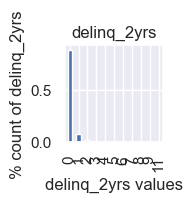

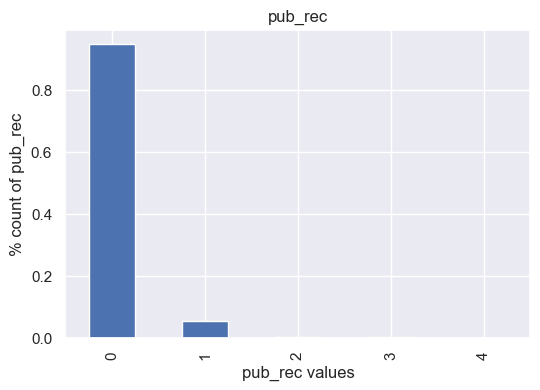

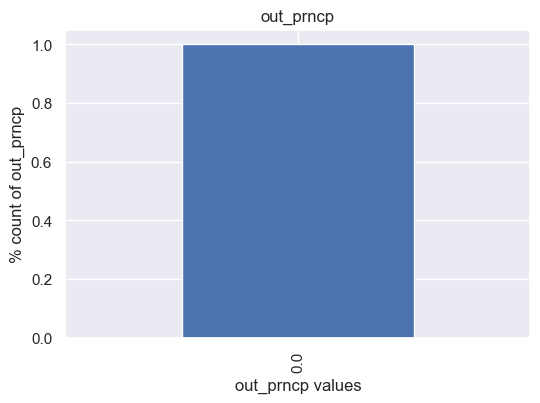

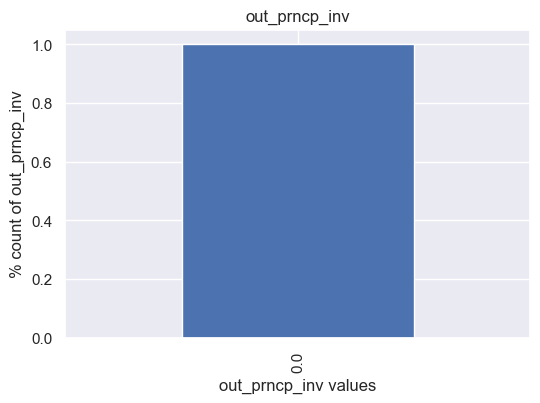

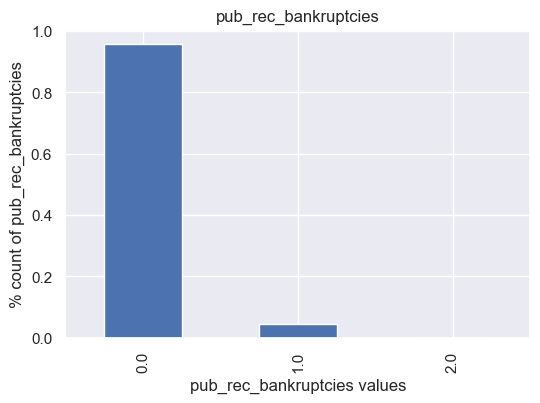

In [246]:
import math

size = math.ceil(loan_df.shape[1]** (1/2))
fig = plt.figure(figsize=(30, 30))

for i, col in enumerate(columns_to_check):
    fig.add_subplot(20, 20, i + 1)    
    loan_df[col].value_counts(normalize=True).plot(kind="bar", title=col, rot=90)
    plt.xlabel(f'{col} values')
    plt.ylabel(f'% count of {col}')
    plt.show()

# fig.tight_layout()

In [143]:
print(f"recoveries {loan_df['recoveries'].value_counts(normalize=True) * 100}")
print(f"collection_recovery_fee {loan_df['collection_recovery_fee'].value_counts(normalize=True) * 100}")

recoveries 0.000000      89.066024
11.290000      0.010369
10.400000      0.010369
10.660000      0.007777
44.920000      0.007777
                 ...   
764.690000     0.002592
653.080000     0.002592
1080.960000    0.002592
878.190000     0.002592
21.290000      0.002592
Name: recoveries, Length: 4040, dtype: float64
collection_recovery_fee 0.000000     90.196231
2.000000      0.031107
1.200000      0.025922
3.710000      0.023330
1.880000      0.020738
                ...   
3.790000      0.002592
773.490000    0.002592
272.825000    0.002592
1.769700      0.002592
0.230000      0.002592
Name: collection_recovery_fee, Length: 2616, dtype: float64


we see that columns delinq_2yrs, pub_rec, out_prncp, out_prncp_inv,  pub_rec_bankruptcies, recoveries, collection_recovery_fee majority of the values are 0 and hence these columns are dropped from analysis as it wont result in meaningful analysis

In [23]:
loan_df.drop(columns=columns_to_check, axis=1, inplace=True)
loan_df.drop(columns=cols, axis=1, inplace=True)

Removing outliers

In [24]:
def remove_outliers(col):
    """remove_outliers using IQR approach"""
    Q1 = loan_df[col].quantile(0.25)
    Q3 = loan_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return loan_df[(loan_df[col] >= lower_bound) & (loan_df[col] <= upper_bound)][col]

for col in num_cols_new:
    print(col)
    loan_df[col] = remove_outliers(col)

loan_amnt
funded_amnt
int_rate
installment
annual_inc
dti
open_acc
revol_bal
total_acc
total_pymnt
total_rec_prncp


After data analysis, below are columns which wont help much in analysis and is not considered for analysis:

total_pymnt_inv
funded_amnt_inv
emp_title 
title
last_payment_d
last_credit_pull_d
earliest_cr_line

# Derived Metrics

In [25]:
loan_df['loan_year'] = loan_df['issue_d'].dt.year
loan_df['loan_month'] = loan_df['issue_d'].dt.month_name()
loan_df['loan_status_converted'] = loan_df['loan_status'].apply(lambda x : 0 if x =='Fully Paid' else 1)

Deriving loan_year, loan_month and loan_status from existing fields for better analysis

# Univariate Analysis and Segmented univariate Analysis

Analysing categorical variables

In [220]:
def plot_countplot(col):
    """This function plots count plot for different variables"""

    plt.figure(figsize =(10,7))
    print(f"Value counts for {col} --> \n{loan_df[col].value_counts(normalize=True)}")
    ax = sns.countplot(loan_df[col]) # plotting it as well
    # plt.xticks(size =12)
    # plt.yticks(size = 12)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/len(loan_df))
        x = p.get_x() + p.get_width()
        y = p.get_height()
        ax.annotate(percentage, (x, y),ha='center')
    plt.xticks(rotation=60)   
    plt.ylabel(f'value count of {col}')
    plt.show()

Analysing variables one by one

Value counts for term --> 
36 months   0.754232
60 months   0.245768
Name: term, dtype: float64


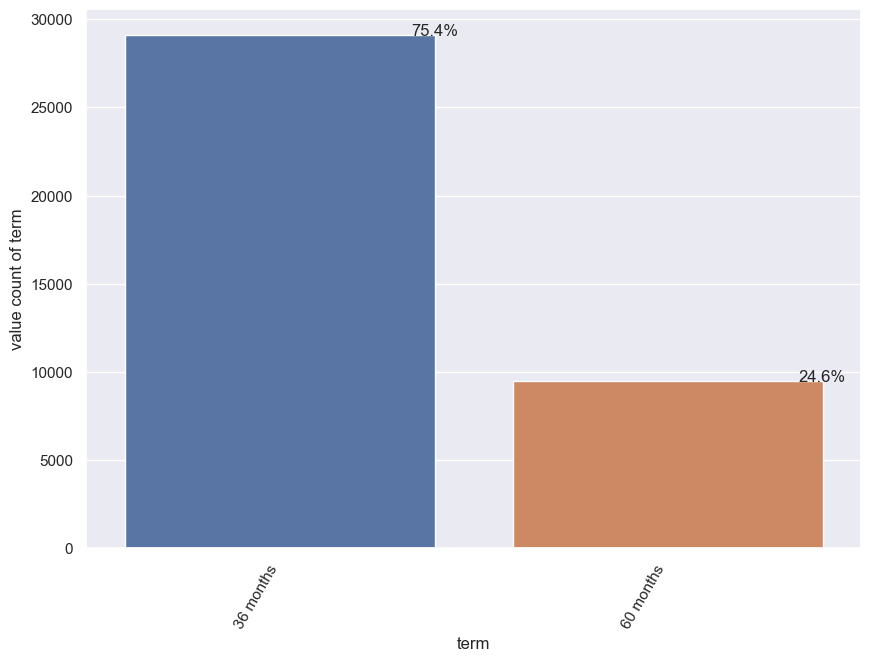

Value counts for grade --> 
B   0.302641
A   0.260388
C   0.203074
D   0.131814
E   0.069031
F   0.025300
G   0.007751
Name: grade, dtype: float64


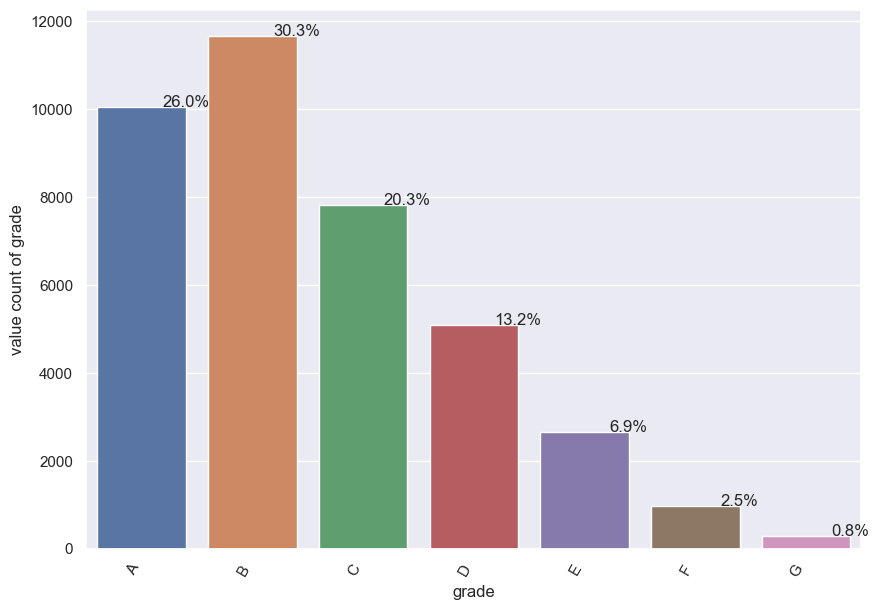

Value counts for sub_grade --> 
A4   0.074474
B3   0.073230
A5   0.070379
B5   0.067787
B4   0.063172
C1   0.053270
B2   0.051870
C2   0.050056
A3   0.046919
B1   0.046582
A2   0.039091
C3   0.038572
D2   0.033336
C4   0.031262
C5   0.029914
A1   0.029525
D3   0.028929
D1   0.024134
D4   0.023797
D5   0.021619
E1   0.018716
E2   0.015916
E3   0.013376
E4   0.010991
E5   0.010032
F1   0.007906
F2   0.006040
F3   0.004510
F4   0.003914
F5   0.002929
G1   0.002437
G2   0.001996
G4   0.001400
G3   0.001166
G5   0.000752
Name: sub_grade, dtype: float64


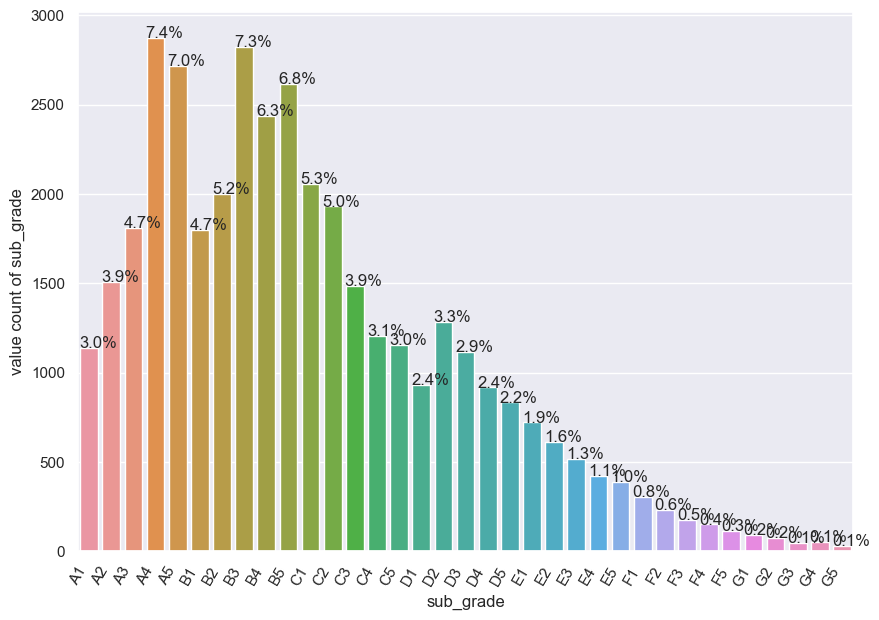

Value counts for emp_length --> 
10+ years   0.220027
< 1 year    0.116857
2 years     0.111232
3 years     0.104000
4 years     0.086632
5 years     0.082795
1 year      0.082147
6 years     0.056199
7 years     0.044353
8 years     0.037198
9 years     0.031781
OTHER       0.026778
Name: emp_length, dtype: float64


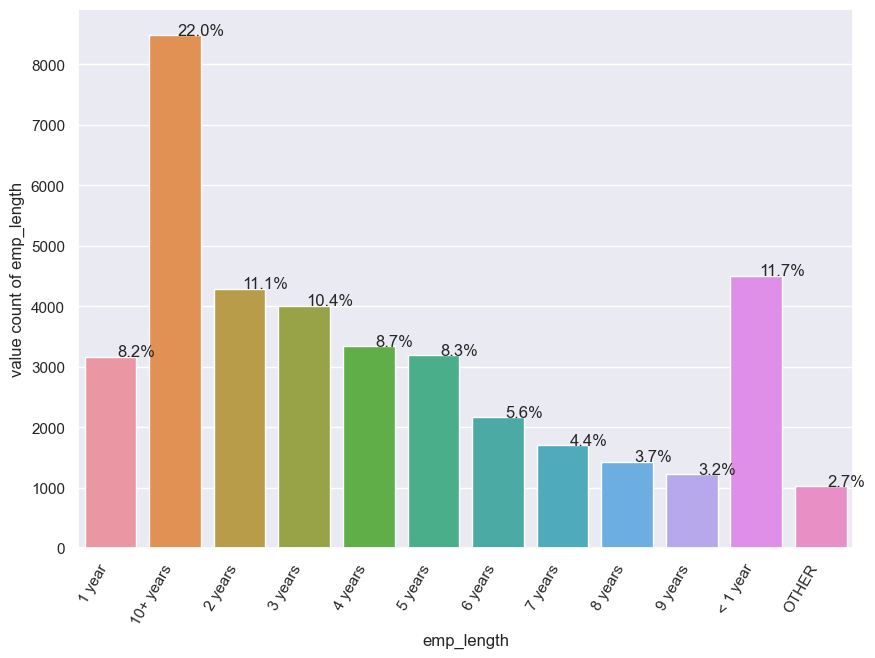

Value counts for home_ownership --> 
RENT       0.479042
MORTGAGE   0.441221
OWN        0.077118
OTHER      0.002540
NONE       0.000078
Name: home_ownership, dtype: float64


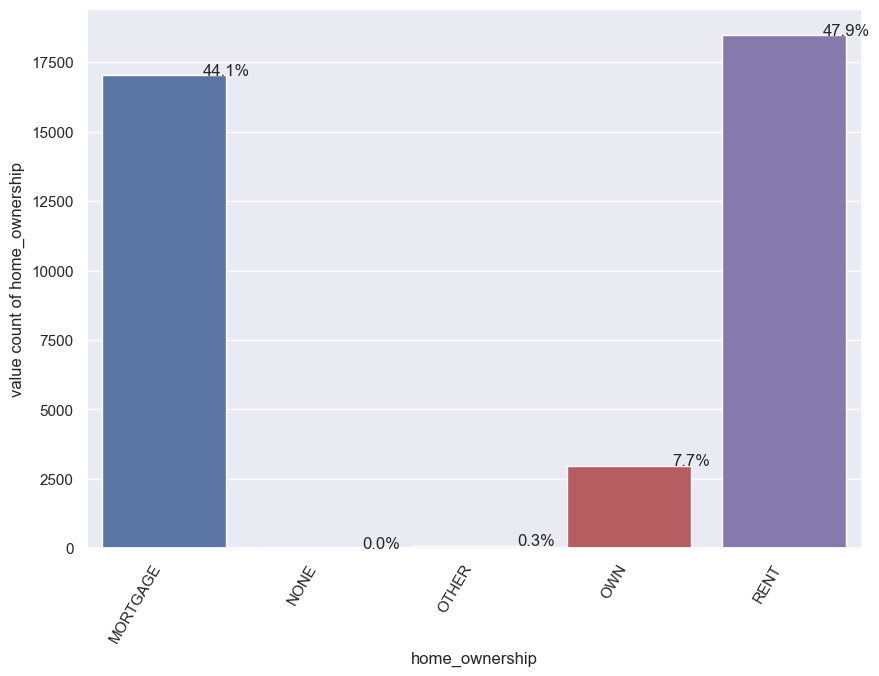

Value counts for verification_status --> 
Not Verified      0.432745
Verified          0.316406
Source Verified   0.250849
Name: verification_status, dtype: float64


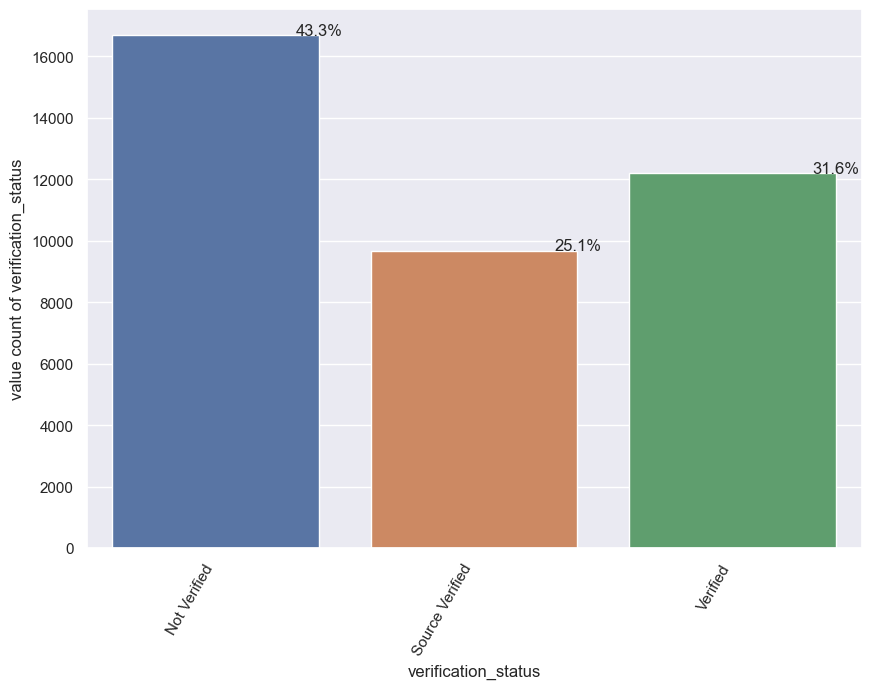

Value counts for purpose --> 
debt_consolidation   0.468025
credit_card          0.130311
other                0.100189
home_improvement     0.074526
major_purchase       0.055733
small_business       0.045468
car                  0.038857
wedding              0.024004
medical              0.017653
moving               0.014931
vacation             0.009721
house                0.009513
educational          0.008425
renewable_energy     0.002644
Name: purpose, dtype: float64


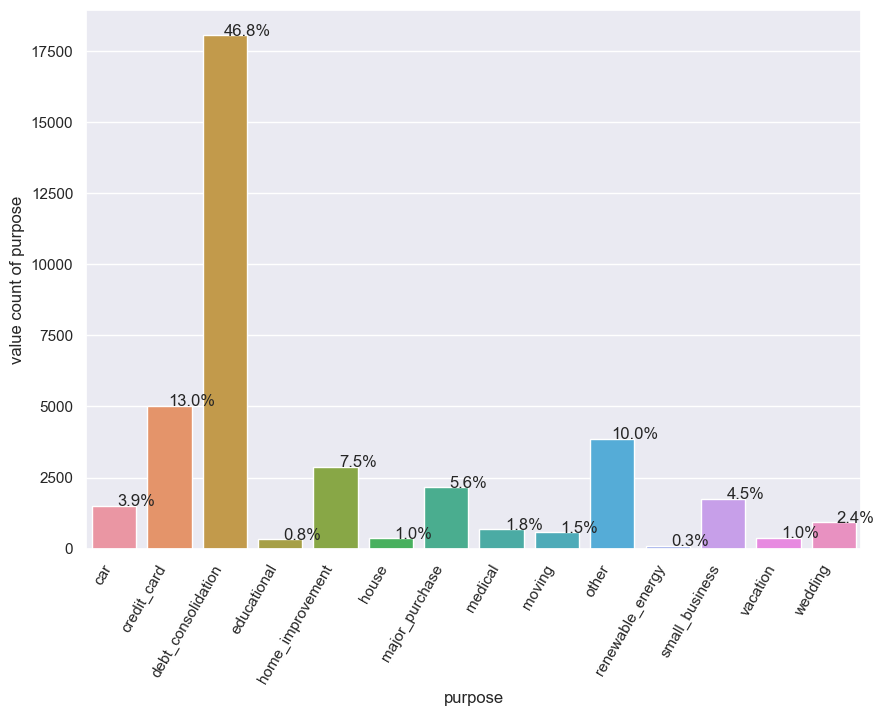

Value counts for addr_state --> 
CA   0.180133
NY   0.095860
FL   0.072090
TX   0.068927
NJ   0.046401
IL   0.038313
PA   0.038054
VA   0.035487
GA   0.035228
MA   0.033621
OH   0.030536
MD   0.026518
AZ   0.022008
WA   0.021204
CO   0.019856
NC   0.019442
CT   0.018820
MI   0.018249
MO   0.017368
MN   0.015683
NV   0.012417
SC   0.011898
WI   0.011406
AL   0.011276
OR   0.011276
LA   0.011069
KY   0.008062
OK   0.007440
KS   0.006610
UT   0.006532
AR   0.006092
DC   0.005470
RI   0.005029
NM   0.004744
WV   0.004459
HI   0.004303
NH   0.004303
DE   0.002929
MT   0.002152
WY   0.002074
AK   0.002022
SD   0.001607
VT   0.001374
MS   0.000493
TN   0.000441
IN   0.000233
ID   0.000156
NE   0.000130
IA   0.000130
ME   0.000078
Name: addr_state, dtype: float64


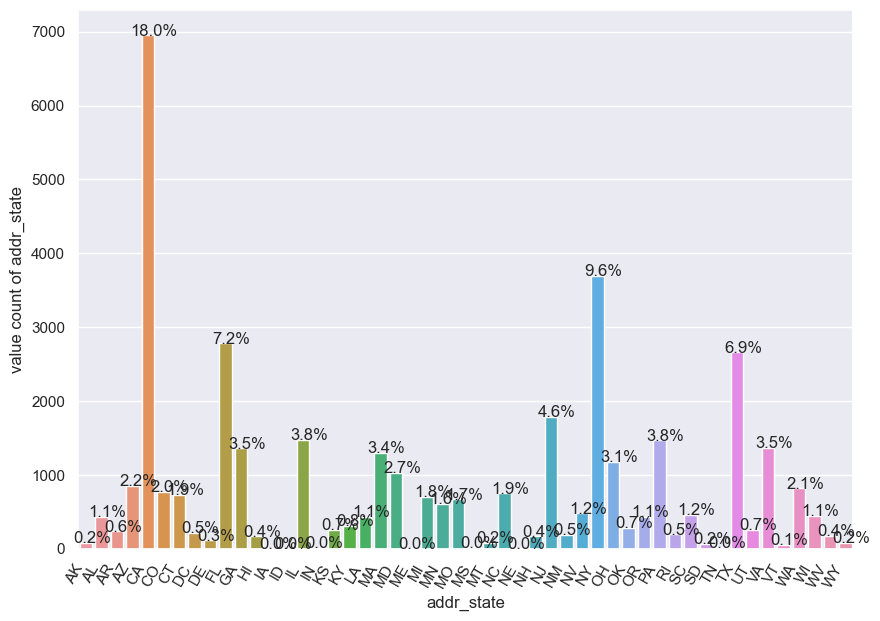

Value counts for loan_month --> 
December    0.109262
November    0.103844
October     0.097493
September   0.090676
August      0.087824
July        0.086865
June        0.082433
May         0.075667
April       0.073386
March       0.069757
January     0.061669
February    0.061125
Name: loan_month, dtype: float64


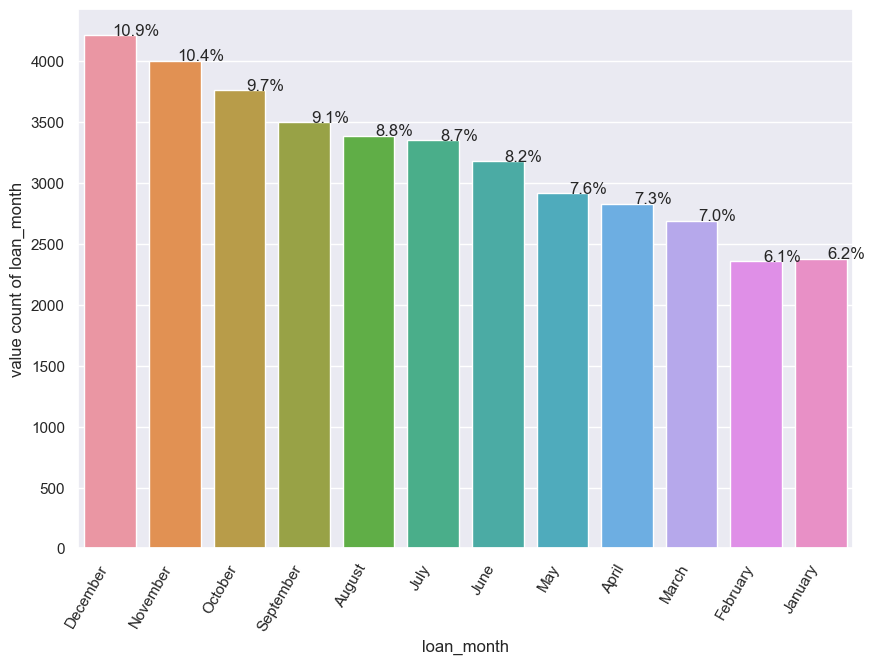

Value counts for loan_year --> 
2011   0.531819
2010   0.298935
2009   0.122249
2008   0.040490
2007   0.006506
Name: loan_year, dtype: float64


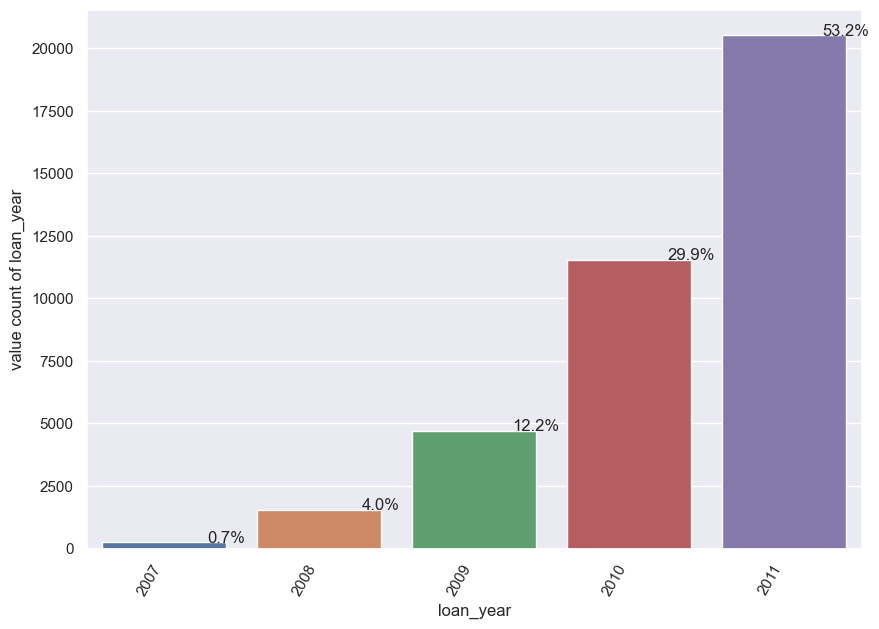

In [221]:
for cols in cat_cols_new:
    plot_countplot(cols)

# Insights

From above graphs, 36 months has higher weightage compared to 60 months. More loans have been given for shorter duration
Grade Column: People belonging A and B grades have been favoured compared to other grades. This might be because A and B represents customers at a higher level(e.g VP, AVP etc.) compared to others.

Sub-Grades: Each grades have then mutiple sub-grades. Among those, A4, B3, A5 have been favoured more compared to others. Followed by B5, B4.
From the data it seems like within subgrades, customer level follows ascending order. 5 is highest then 4 and so on.

Emp-length : Customers who has more employment tenure are favoured. These customers are the best suited for lending Clubs as these customers will have consistent source of income resulting in repayment of loans.

Home-Ownership: in this case, customers who are renting or paying mortgage have higher changes of taking loans. This could also be because they would want to or already purchased homes. Customers who owns the home mght not need to borrow from the banks/ lending clubs

Verification-Status : From the data pattern, it seems that majority of loans or defaulters are because these customers where not verified.
Customers whose income source was verified or were verified by LC they have lesser chances of defaulting.

Purpose: Majority of loans were taken by the customers belongs to the category of debt-consolidation followed by credit card.

Addr-State: Majority of customers within US belongs to California Region.

Loan-Month : Majority of customers were issued loans during December, followed by Novemeber, October and so on. This might also be because customers would want to purchase house or have other plans for next year.

Loan-Year: Over the period of time, we are seeing borrowing has considerably increased in 2011 compared to other years.

# Analyzing numerical columns

In [196]:
def plot_numeric_plots(col):
    print(col)
    print(loan_df[col].describe())
    sns.set(rc={'figure.figsize':(6,4)})
    sns.distplot(loan_df[col], color='purple').set(title=f"distribution plot for {col}")
    plt.show()
    sns.boxplot(loan_df[col], color='purple').set(title=f"box plot for {col}")
    plt.show()

loan_amnt
count   37489.000000
mean    10408.101043
std      6398.162546
min       500.000000
25%      5000.000000
50%      9250.000000
75%     14975.000000
max     29550.000000
Name: loan_amnt, dtype: float64


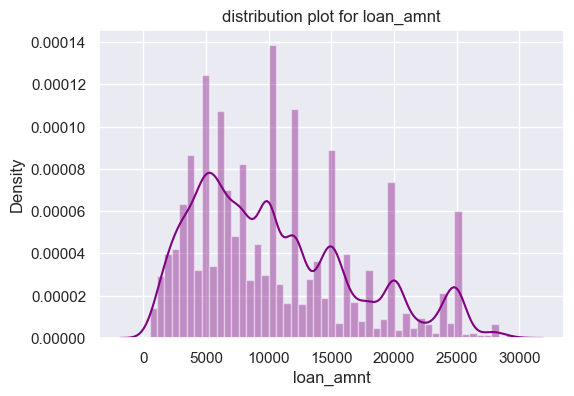

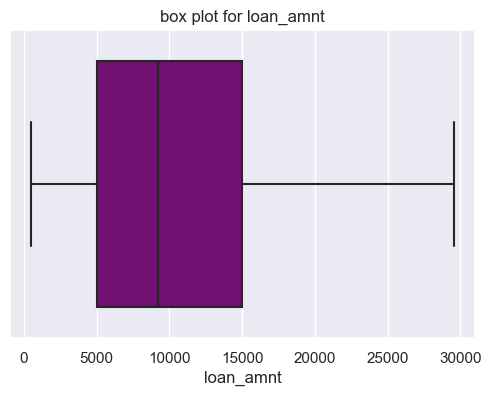

In [197]:
plot_numeric_plots('loan_amnt')

# Insights:

The distribution plot does not show a uniform distribution in data for funded amount.
Majority of customers where granted loans betweem 5k to 15k USD.
However , amjority of borrowers are funded approx 9k as we can see from distribution plot and box plot as well.

funded_amnt
count   37657.000000
mean    10240.825743
std      6244.584160
min       500.000000
25%      5000.000000
50%      9000.000000
75%     14400.000000
max     29700.000000
Name: funded_amnt, dtype: float64


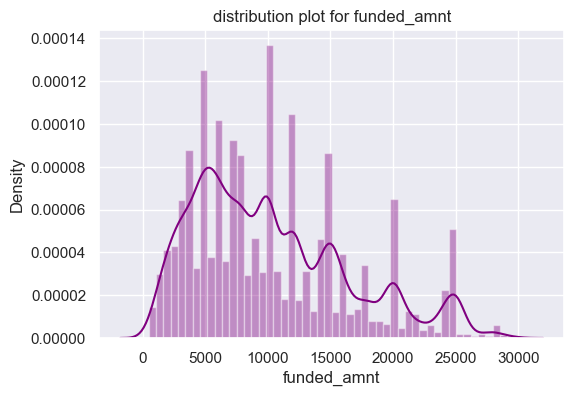

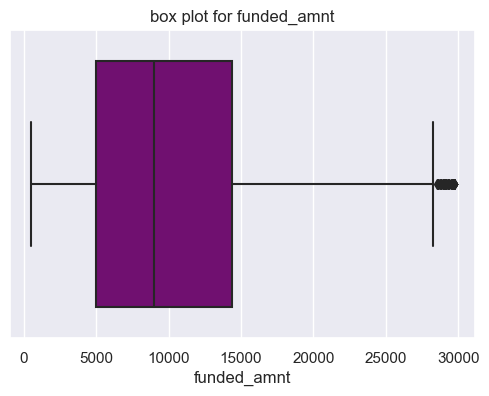

In [198]:
plot_numeric_plots('funded_amnt')

Insights:

The distribution plot does not show a uniform distribution in data for funded amount.
Loan funded lies between 5k to 14k. However , amjority of borrowers are funded 10k as we can see from distribution plot and box plot as well.

int_rate
count   38512.000000
mean       11.913126
std         3.664993
min         5.420000
25%         8.940000
50%        11.710000
75%        14.350000
max        22.480000
Name: int_rate, dtype: float64


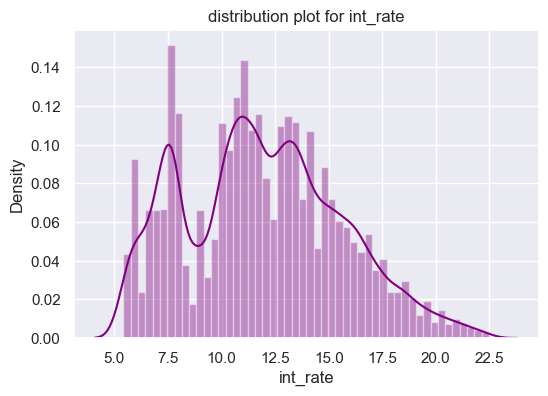

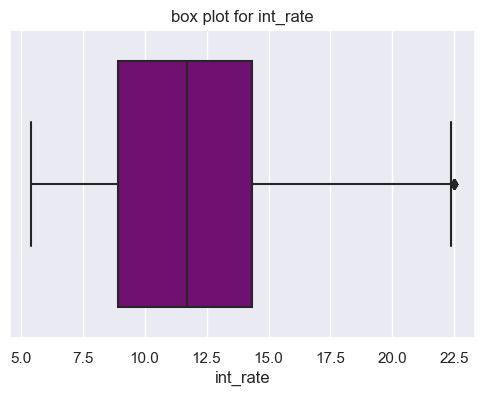

In [199]:
plot_numeric_plots('int_rate')

Insights:

The distribution plot does not show a uniform distribution in data for interest rate.
However, majority of the customers are provided an interest rate of approx 11% which is quite high. This could be one of the factors for defaulting customers

installment
count   37204.000000
mean      300.444607
std       176.196017
min        15.690000
25%       163.032500
50%       268.910000
75%       402.080000
max       815.250000
Name: installment, dtype: float64


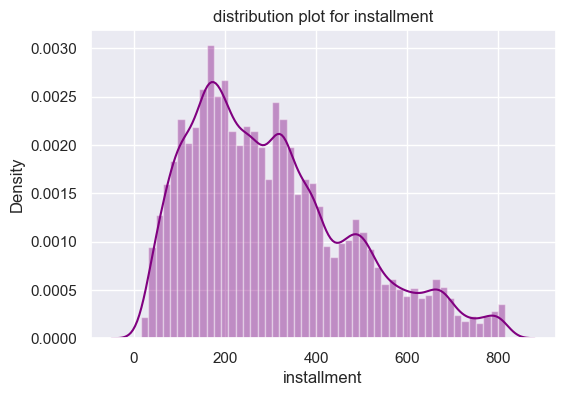

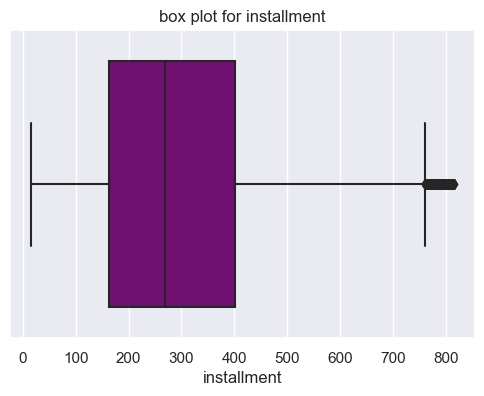

In [200]:
plot_numeric_plots('installment')

Insights:

Majority of people pay installement between approx. 160 and 400k which is less.
The distribution of installement is also not uniform.

annual_inc
count    36815.000000
mean     61218.193490
std      28224.583784
min       4000.000000
25%      40000.000000
50%      56000.000000
75%      78000.000000
max     145000.000000
Name: annual_inc, dtype: float64


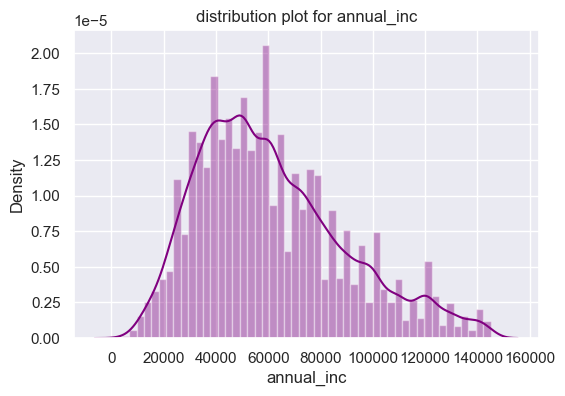

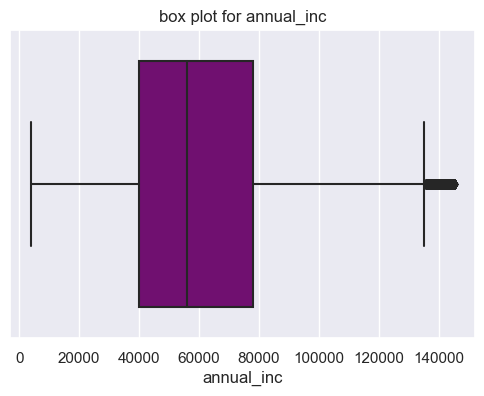

In [201]:
plot_numeric_plots('annual_inc')

Insights:

Borrower`s annual income starts from 40k to 78k and the favorables are the ones earling approx 56K

dti
count   38577.000000
mean       13.272727
std         6.673044
min         0.000000
25%         8.130000
50%        13.370000
75%        18.560000
max        29.990000
Name: dti, dtype: float64


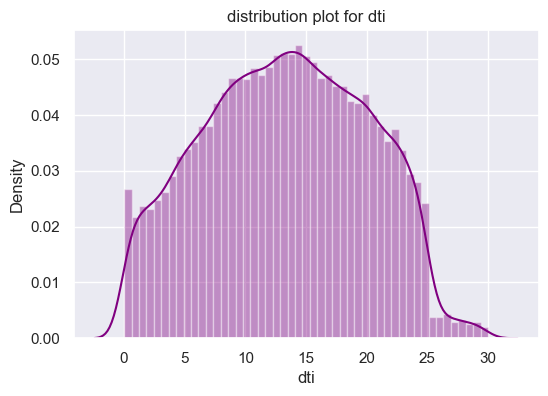

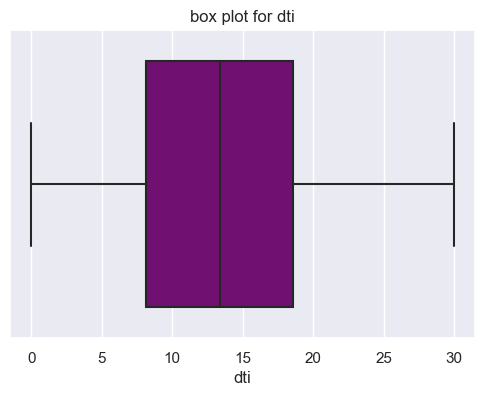

In [202]:
plot_numeric_plots('dti')

Insights:

Borrower`s dti lies between approx. 8 to 18 and among them majority has dti of approx. 13
The distribution plot of dti is somewhat uniform.

open_acc
count   38082.000000
mean        9.074235
std         4.040709
min         2.000000
25%         6.000000
50%         8.000000
75%        12.000000
max        21.000000
Name: open_acc, dtype: float64


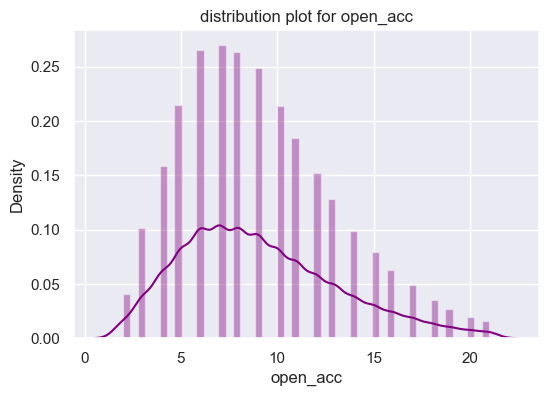

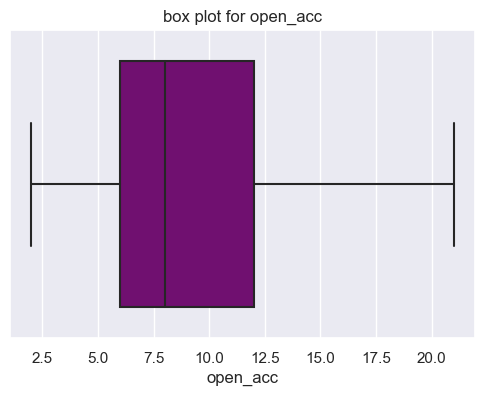

In [203]:
plot_numeric_plots('open_acc')

Insights:

The distibution plot of open_acc is uniform with majority values ranging from 6 to 12. 

revol_bal
count   36154.000000
mean    10136.680257
std      8474.775240
min         0.000000
25%      3367.000000
50%      8035.000000
75%     14848.750000
max     36793.000000
Name: revol_bal, dtype: float64


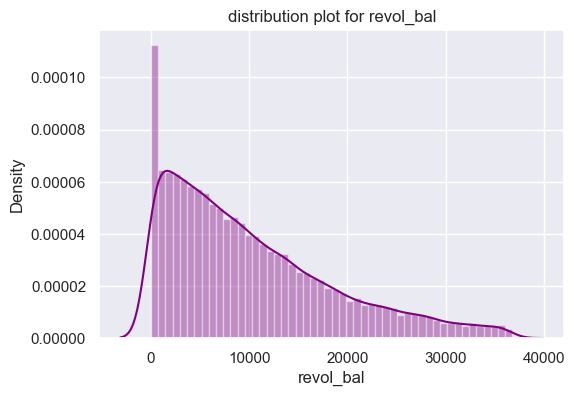

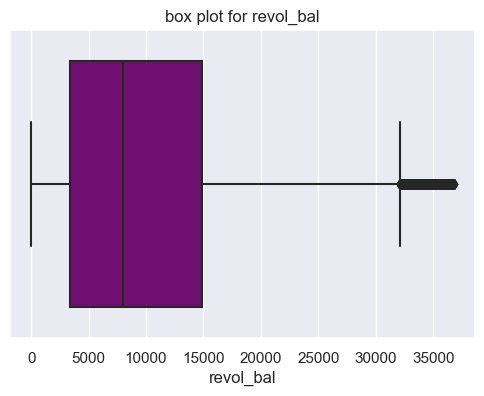

In [204]:
plot_numeric_plots('revol_bal')

Insights:

The distribution plot for revol_bal is skwed and majority values ranging from approx. 3k to 14k.
This is the credit borrower which is available to the borrower as he/she pays the balance.

total_acc
count   38064.000000
mean       21.548734
std        10.625418
min         2.000000
25%        13.000000
50%        20.000000
75%        28.000000
max        53.000000
Name: total_acc, dtype: float64


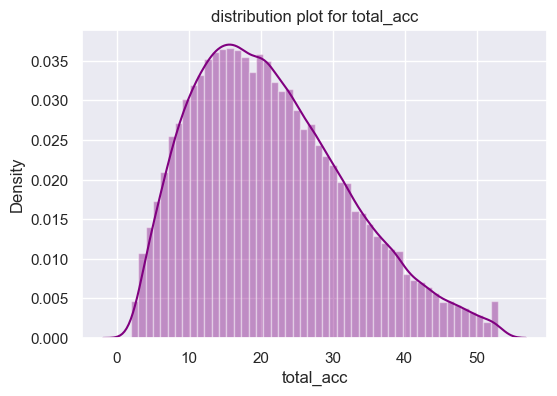

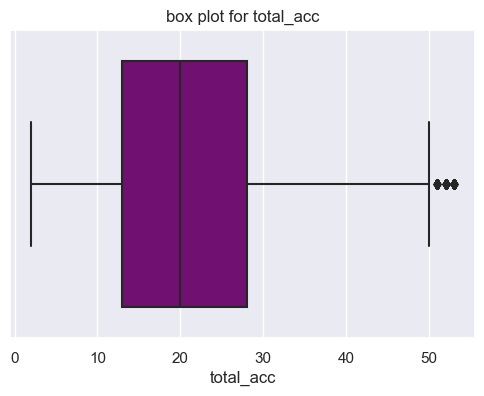

In [205]:
plot_numeric_plots('total_acc')

Insights:

Values of otal_account is somewhat balanced with majority of them falling in the range of 13 to 53.
The median of total_accounts of borrower is 20. 

total_pymnt
count   37301.000000
mean    10935.541466
std      7278.209598
min         0.000000
25%      5414.290000
50%      9327.276995
75%     15162.992110
max     32060.886730
Name: total_pymnt, dtype: float64


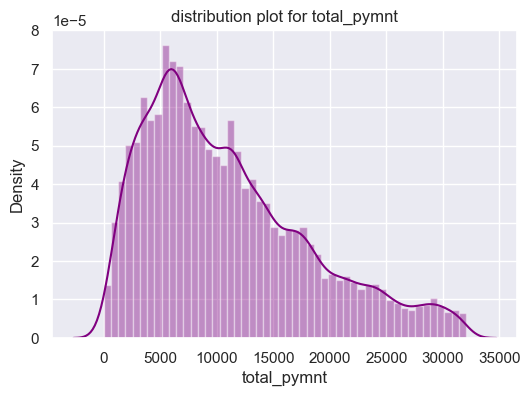

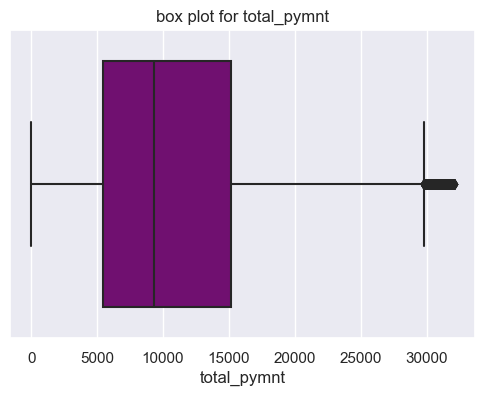

In [206]:
plot_numeric_plots('total_pymnt')

Insights:

Total payment by borrower lies between approx 5k to 15k with skewed distribution.
Majority of them pays approx. 9k.

total_rec_prncp
count   37634.000000
mean     9094.883858
std      6132.904364
min         0.000000
25%      4400.000000
50%      8000.000000
75%     12475.000000
max     26074.750000
Name: total_rec_prncp, dtype: float64


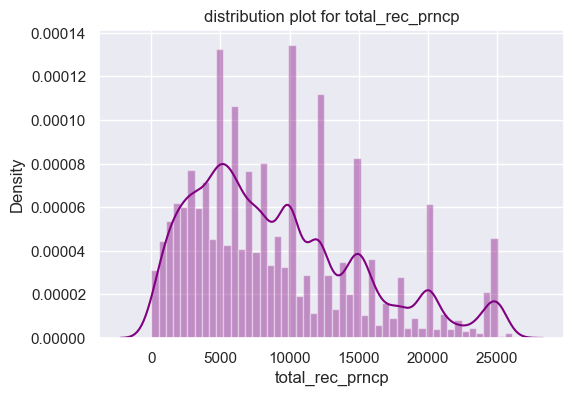

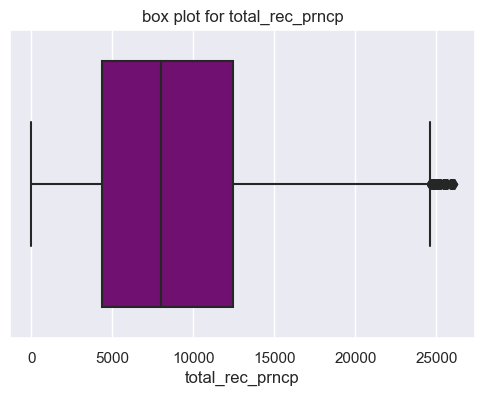

In [207]:
plot_numeric_plots('total_rec_prncp')

Insights:

Total_rec_prncp is the total principal received till date. The payment values are not distributed uniformly.
The majority of payments are done between approx. 4k to 12k with median payments being 8k

In [152]:
loan_df.groupby('loan_status_converted').size()

loan_status_converted
0    32950
1     5627
dtype: int64

In [211]:
def crosstab_analysis(col, target_variable='loan_status_converted'):
    """Analysing the effect of target variable on each categorical or numerical columns"""
    charged_off = loan_df[loan_df['loan_status_converted'] ==1]
    result = pd.crosstab(index=charged_off[col], columns=charged_off['loan_status_converted'])
    print(result)
    ax = result.plot.bar()
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/len(charged_off))
        x = p.get_x() + p.get_width()
        y = p.get_height()
        ax.annotate(percentage, (x, y),ha='center')
    
    plt.ylabel(f'Count of {col} values')
    plt.xticks(rotation=60)   
    plt.show()

loan_status_converted     1
term                       
36 months              3227
60 months              2400


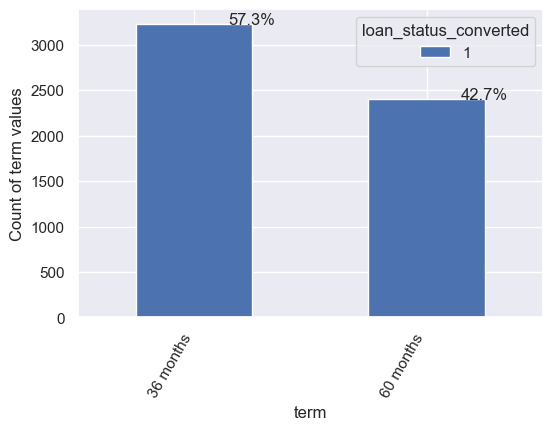

In [212]:
crosstab_analysis('term')

Insights:

Since majority of borrowers has borrowed loan of lower duration they have high risk of defaulting as well.

loan_status_converted     1
grade                      
A                       602
B                      1425
C                      1347
D                      1118
E                       715
F                       319
G                       101


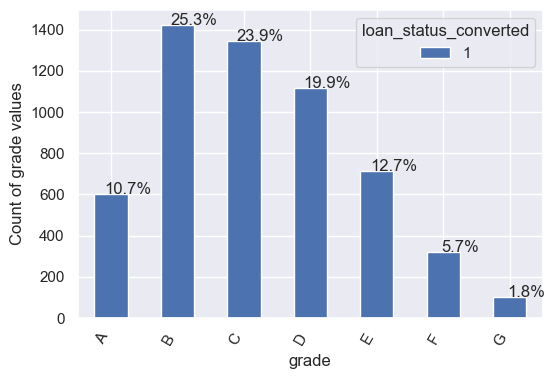

In [213]:
crosstab_analysis('grade')

Insights:

Majority of defaulters belong to B and C Category followed by D , E and then A.
Customers beloning to these categories can be classified as risky customers and other parameters should be checked before lending the loan

loan_status_converted     1
emp_length                 
1 year                  456
10+ years              1331
2 years                 567
3 years                 555
4 years                 462
5 years                 458
6 years                 307
7 years                 263
8 years                 203
9 years                 158
< 1 year                639
OTHER                   228


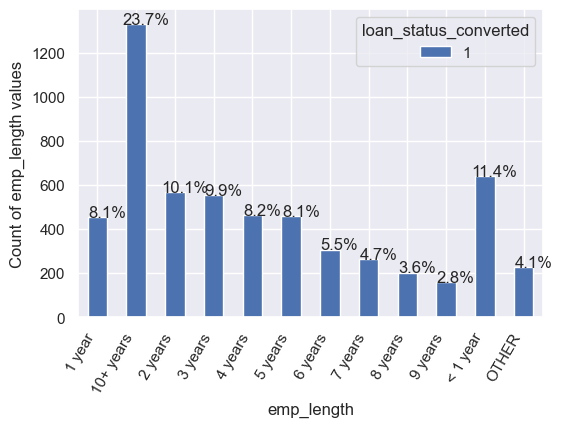

In [214]:
crosstab_analysis('emp_length')

Insights:

Majprity of defaulters has an employment tenure of more than 10 yrs, followed by the ones who has lesser tenures (<1 yrs>).
Borrowers with lesser employment tenure can be classified as risky borrowers.

loan_status_converted     1
home_ownership             
MORTGAGE               2327
OTHER                    18
OWN                     443
RENT                   2839


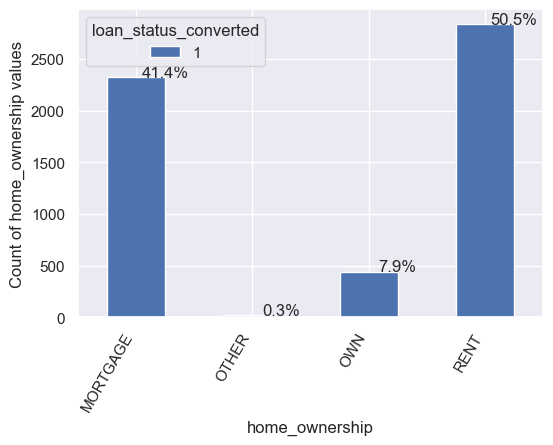

In [215]:
crosstab_analysis('home_ownership')

Insights:

Majority of borrowers have either rented or paying mortgage and hence becomes the risk factor as well for lending.


loan_status_converted     1
verification_status        
Not Verified           2142
Source Verified        1434
Verified               2051


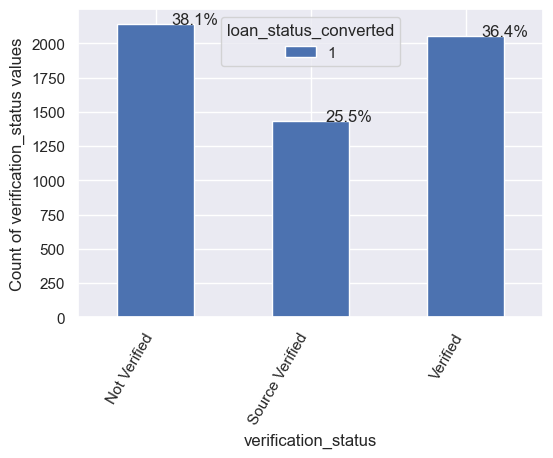

In [216]:
crosstab_analysis('verification_status')

Insights:

Borrowers which are not verified or LC verified becomes the high risk borrowers.
while the ones who are source verified are good borrowers

loan_status_converted     1
purpose                    
car                     160
credit_card             542
debt_consolidation     2767
educational              56
home_improvement        347
house                    59
major_purchase          222
medical                 106
moving                   92
other                   633
renewable_energy         19
small_business          475
vacation                 53
wedding                  96


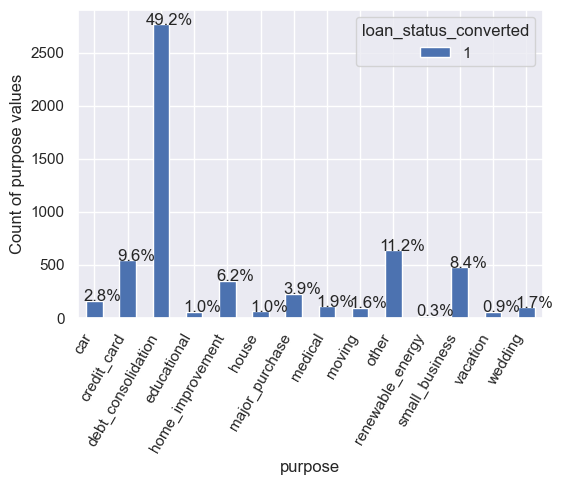

In [217]:
crosstab_analysis('purpose')

Insights:

Since, majority of borrowers have borrowed for the purpose of debt_consolidation hence becomes the risk factor.

loan_status_converted     1
loan_year                  
2007                     45
2008                    247
2009                    594
2010                   1485
2011                   3256


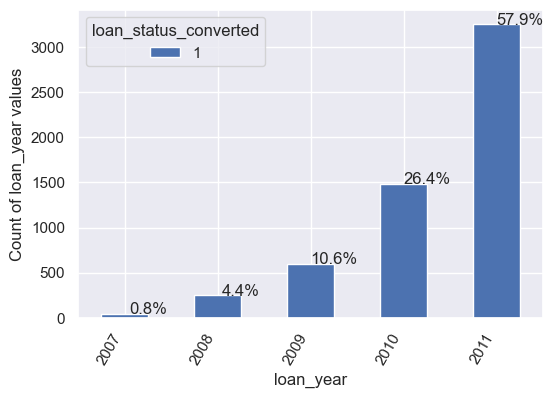

In [218]:
crosstab_analysis('loan_year')

Insights:

Borrowers who have been lended money in 2011 are risky borrowers and shows a high chance defaulting compared to other years

loan_status_converted    1
loan_month                
April                  370
August                 468
December               678
February               290
January                321
July                   479
June                   483
March                  347
May                    466
November               598
October                580
September              547


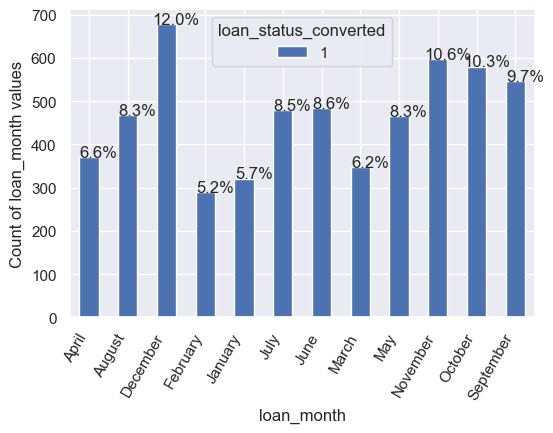

In [219]:
crosstab_analysis('loan_month')

Insights:

People who have borrowed in the month of December are risky borrowers followed by consecutive months in decreasing order

# Bivariate and Multivariate Analysis

<Figure size 600x400 with 0 Axes>

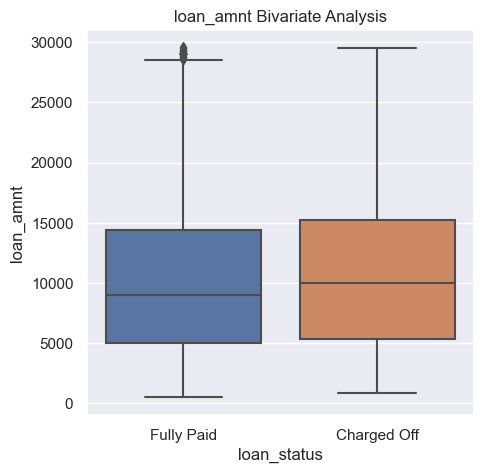

<Figure size 600x400 with 0 Axes>

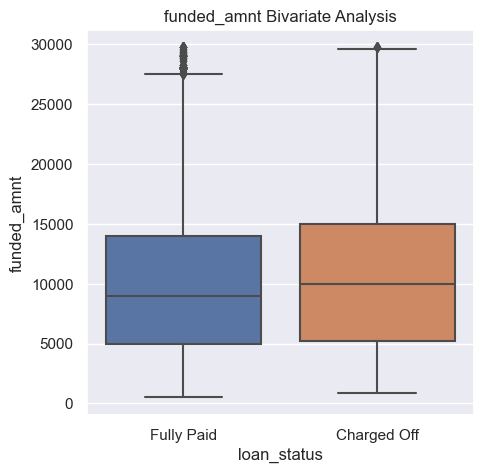

<Figure size 600x400 with 0 Axes>

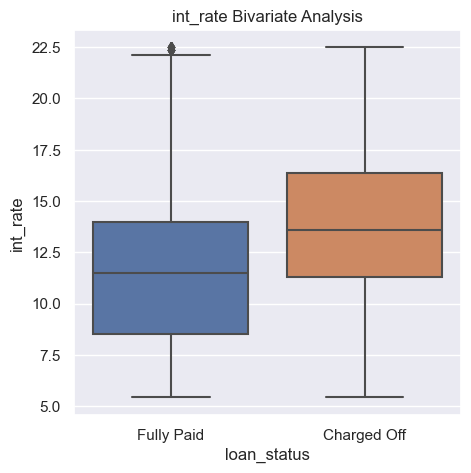

<Figure size 600x400 with 0 Axes>

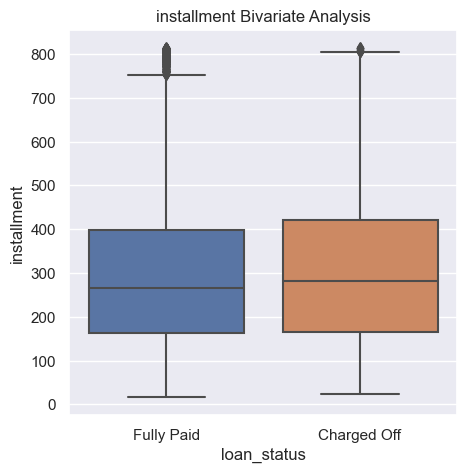

<Figure size 600x400 with 0 Axes>

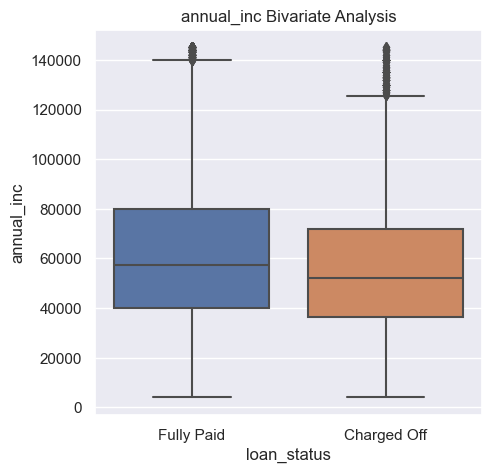

<Figure size 600x400 with 0 Axes>

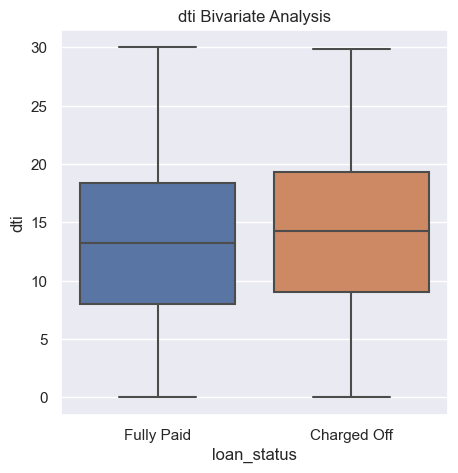

<Figure size 600x400 with 0 Axes>

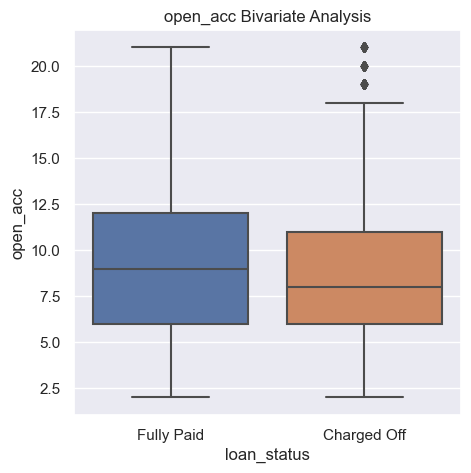

<Figure size 600x400 with 0 Axes>

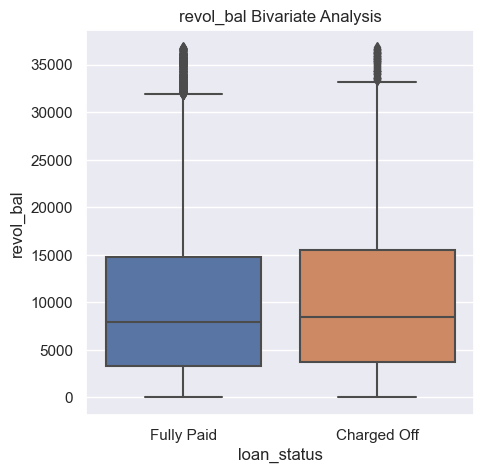

<Figure size 600x400 with 0 Axes>

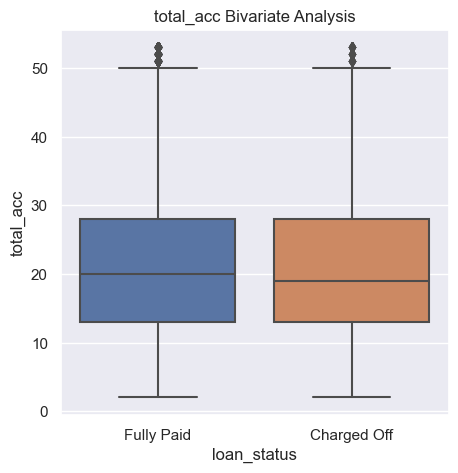

<Figure size 600x400 with 0 Axes>

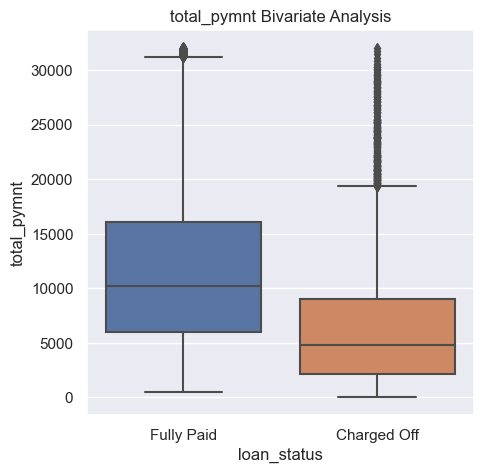

<Figure size 600x400 with 0 Axes>

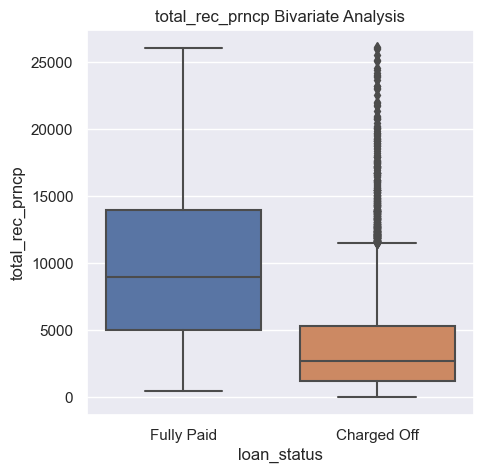

In [162]:
def box_plots(x_val, y_val, data_val):
    plt.clf()
    plt.figure(figsize=(5, 5))
    sns.boxplot(x=x_val, y=y_val, data=data_val)
    plt.title(f'{y_val} Bivariate Analysis')
    plt.show()

for num_val in num_cols_new:
    box_plots(target_variable[0], num_val, loan_df)

Insights:

Loan_amount vs loan_status : With loan amount, customers who are paying or defaulting doesnt have much difference, however still it can said that higher the loan amount higher are the chances of defaulting. 

Funded_amount vs loan_status : With funded amount, customers who are paying or defaulting doesnt have much difference, however still it can inferred that Higher the funding provided by Lending Clubs higher chances of defaulting.

int_rate vs loan_status : It is quite apparant hiher interest rates which have higher risk of defaulting. So, lending clubs should keep interest rate low.

Installment vs loan_status : There isnt much difference in installments paid by fully paid customers or defaulters. So this column does not provide a clear distinction between defaulters and fully paid customers.

Annual_income vs loan_status : With more annual income, customers are fully paying the loan that they borrowed. People with lesser annual income can be risky customers

dti vs loan_status : There is less distingusing factor in dti with fully paying customers and defaulters

Open_acc, revol_balance and total_account vs loan_status : open_account might not be good column for analysis as there is no difference in terms open accounts and fully paying or defaulting. Customers who more total_accounts are slightly better than those who do not have much accounts.

total_payment vs loan_status : Customers/borrowers whose total_payments are more are good customers. The ones with lesser total_payments are risky customers and are more prone to default.

total_rec_prncp: Higher the total principal amount higher changes of fully paying the loan and vice-versa. Customers with lesser value in total_rec_prncp have more chance of defaulting.



Deep Analysis features =>  'int_rate', 'loan_amnt', 'total_pymnt'
Apparently, it is clear from fatures from deep analysis is that, maxim  um defaulters are those who have higher interst rates levied on them, due to which they are unable to payback. Furthermore, for the record, total_payment shows very low from charged off compared to fully paid, if this is a record documented over a period of time, then these factors play huge role in identifying defaulters.  

# Analysing one categorical and one numerical column

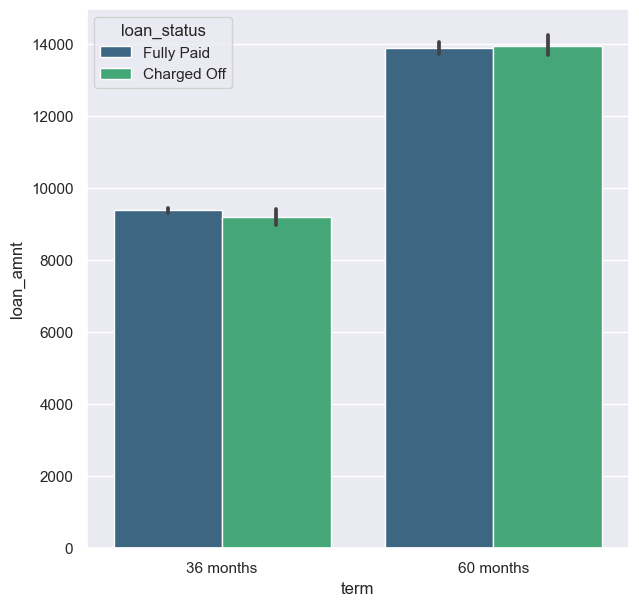

In [181]:
# term vs loan amount
plt.figure(figsize=(7,7))
sns.barplot(data =loan_df,x='term', y='loan_amnt', hue ='loan_status', palette='viridis')
plt.show()

Insights :

Considering loan _amount term and loan_status, higher loan_amount for longer duration, customers tend pay fully and default as well.


<AxesSubplot:xlabel='Categories term vs grade', ylabel='term'>

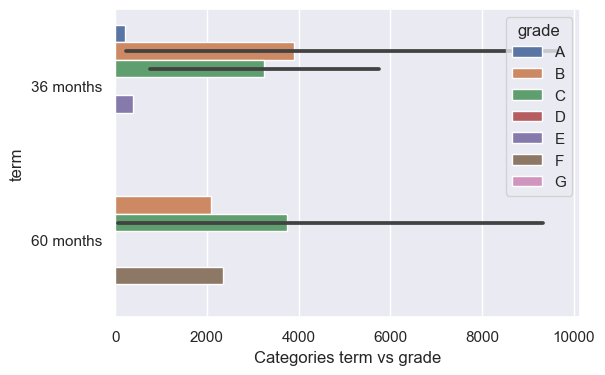

In [164]:
sns.barplot(x='Categories term vs grade',
            y=loan_df['term'],
            hue=loan_df['grade'],
            data=df.groupby([loan_df['term'], loan_df['grade']]).size().to_frame('Categories term vs grade').reset_index())

Insights:

customers of category B and C have higher weightage in short and long duration

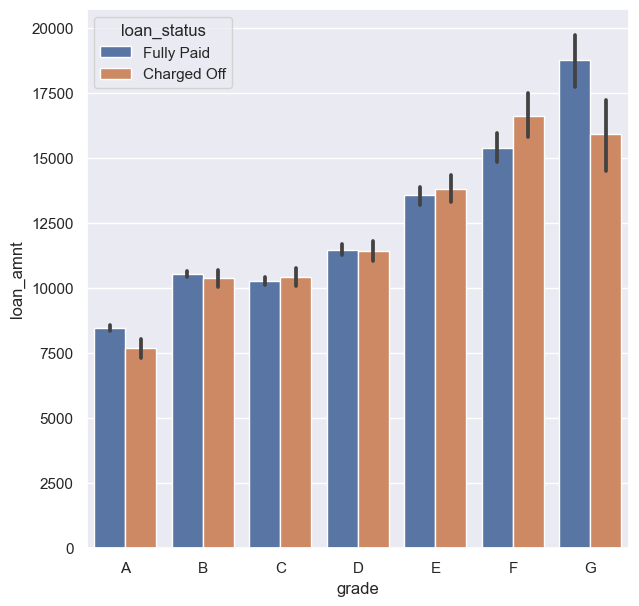

In [165]:
plt.figure(figsize=(7,7))
sns.barplot(data =loan_df,x='grade', y='loan_amnt', hue ='loan_status')
plt.show()

Insights:

so as the loan amount increases, customers belonging to lower grade (E & F) tend to default more and can be risky customers

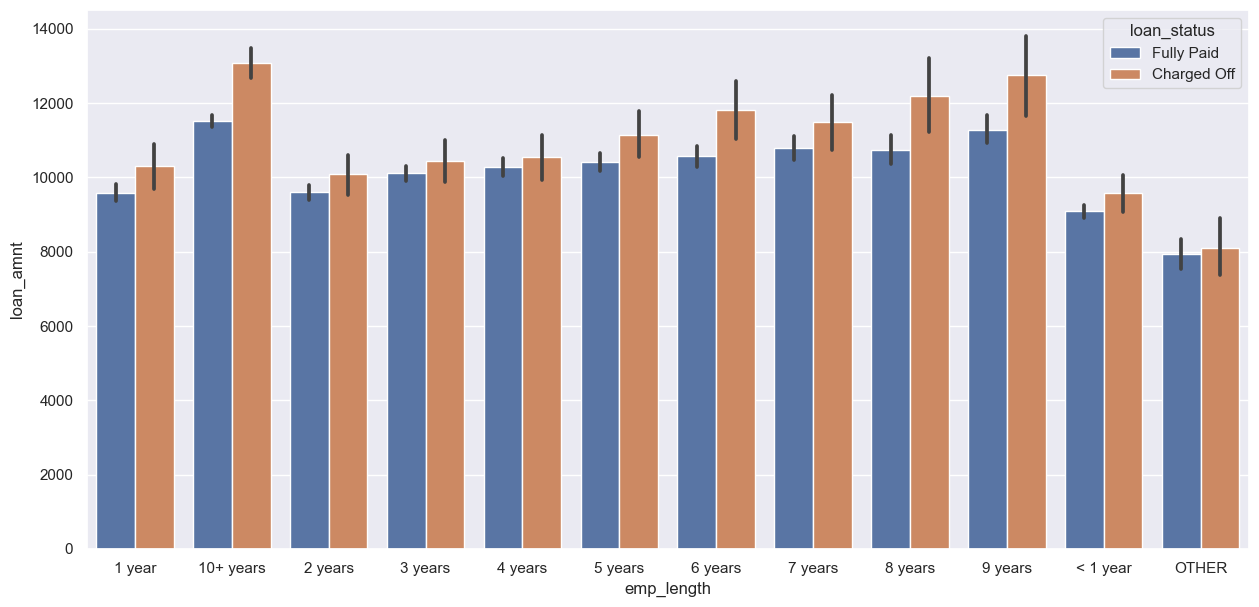

In [166]:
plt.figure(figsize=(15,7))
sns.barplot(data =loan_df,x='emp_length', y='loan_amnt', hue ='loan_status')
plt.show()

Insights:

Customers with 10+ yrs of employment tend to default more followed by cutomers with 9 and 8 yrs for employment tenure. 

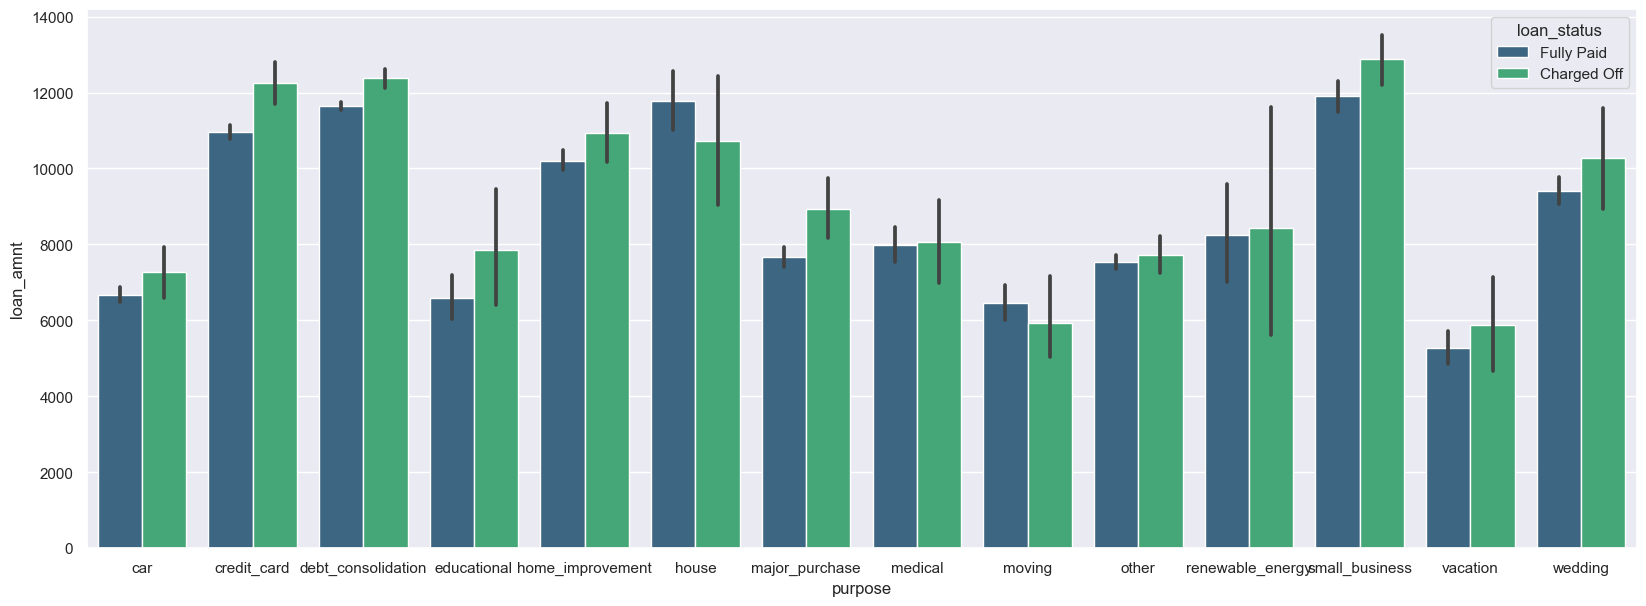

In [210]:
plt.figure(figsize=(20,7))
sns.barplot(data =loan_df,x='purpose', y='loan_amnt', hue ='loan_status', palette='viridis')
plt.show()

Insights:

Customers taken higher loan amount for the purpose of small business have higher tendency of defaulting or are likely to default more compared to others, followed by the higher loan_amoun taken for credit_card and debt_consolidation

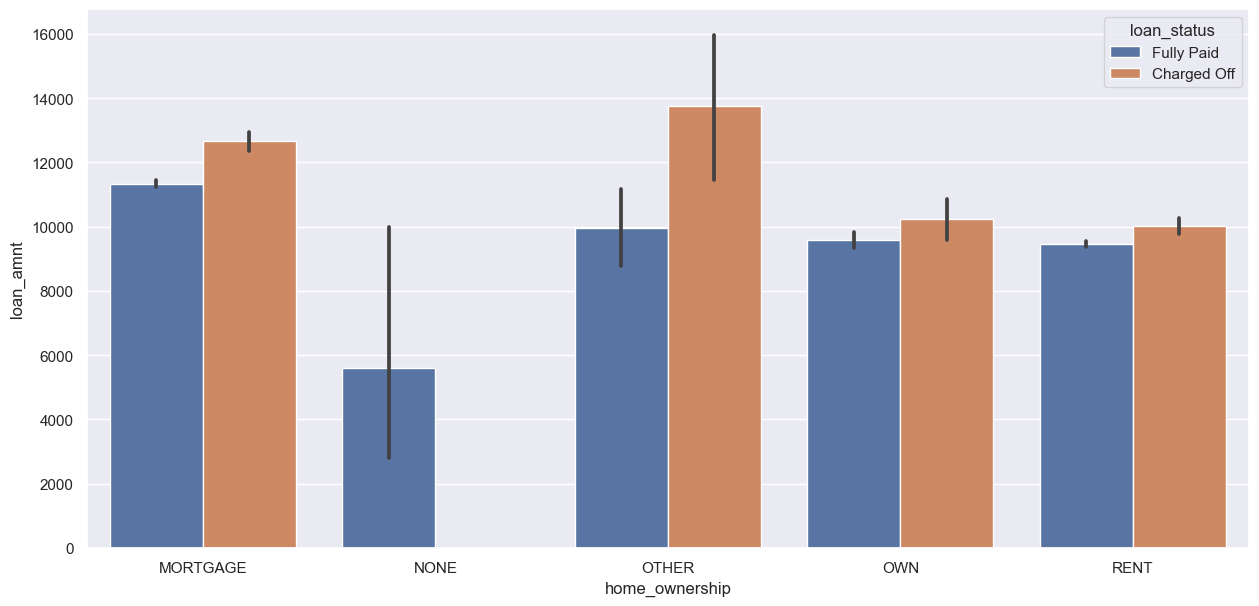

In [168]:
plt.figure(figsize=(15,7))
sns.barplot(data =loan_df,x='home_ownership', y='loan_amnt', hue ='loan_status')
plt.show()

Insights:

Customers who are paying mortgage with higher loan_amount are risky customers and tend to default more

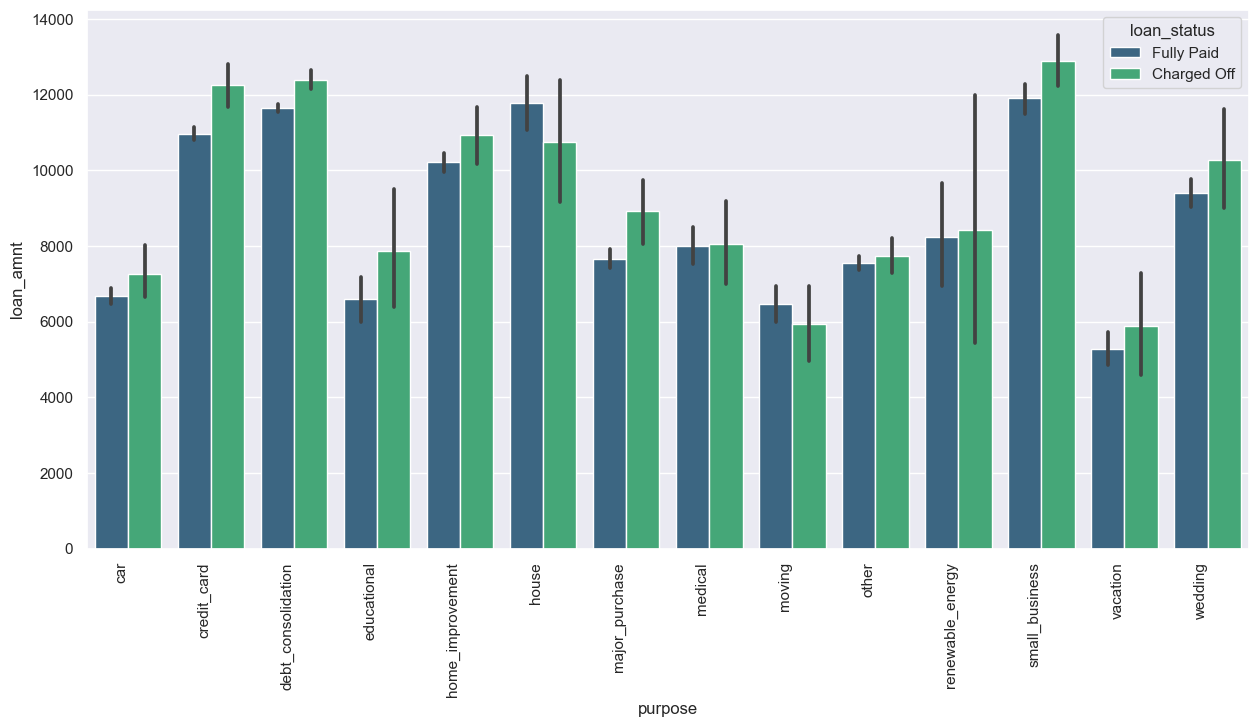

In [179]:
plt.figure(figsize=(15,7))
ax = sns.barplot(data =loan_df,x='purpose', y='loan_amnt', hue ='loan_status', palette='viridis')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.show()

Insights:

higher Loan taken for small business are risky customers with chances of defaulting more compared to others

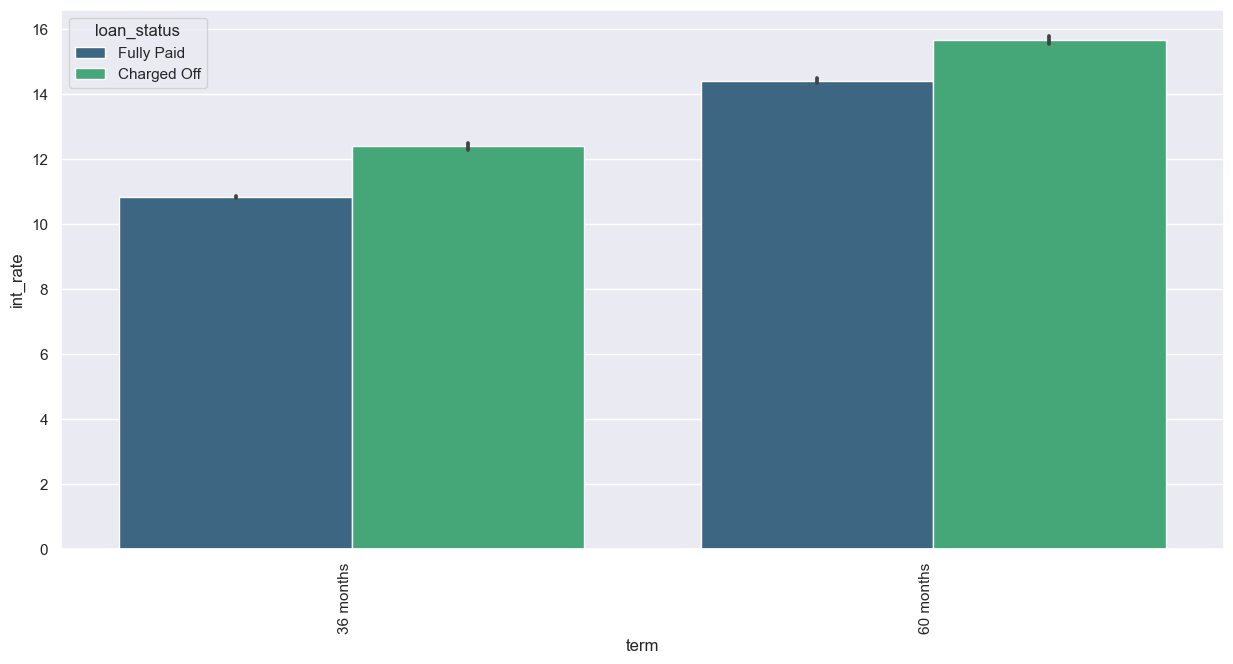

In [178]:
plt.figure(figsize=(15,7))
ax = sns.barplot(data =loan_df,x='term', y='int_rate', hue ='loan_status', palette='viridis')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.show()

Insights:

Higher interest rate for longer duration of loan period(60 monhts) will have impact on customers and those customers will likely to default more.

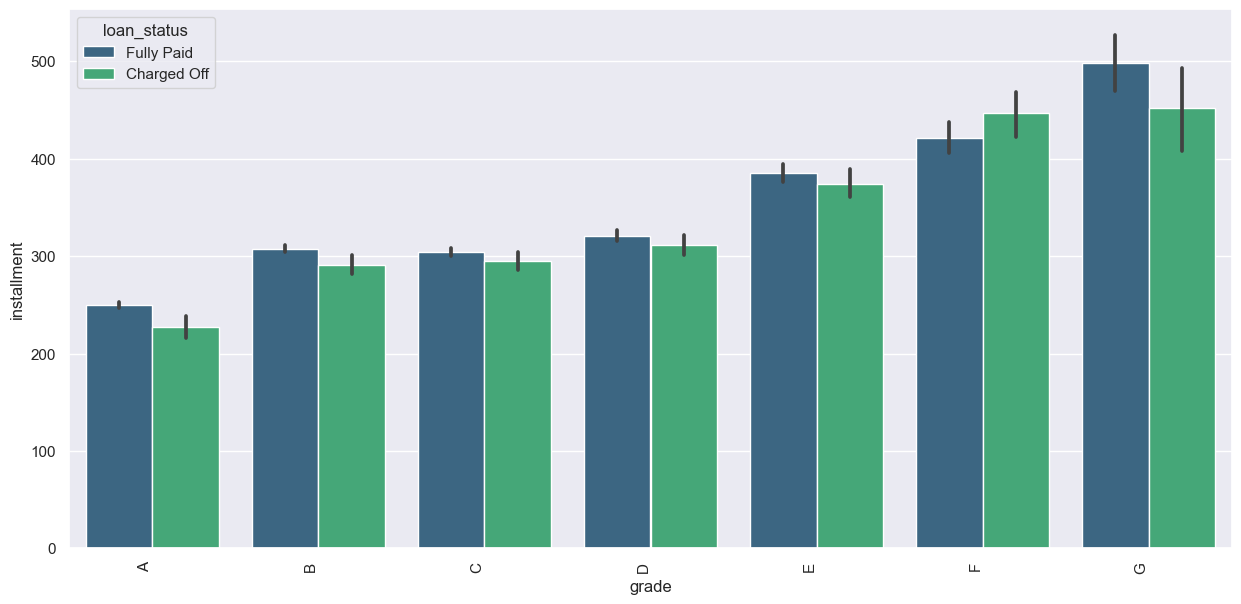

In [177]:
plt.figure(figsize=(15,7))
ax = sns.barplot(data =loan_df,x='grade', y='installment', hue ='loan_status', palette='viridis')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.show()

Insights:

customers Higher the installement amount for lower level of grade (e.g E) will tend to default more and are risky customers

# Analysis based on demography

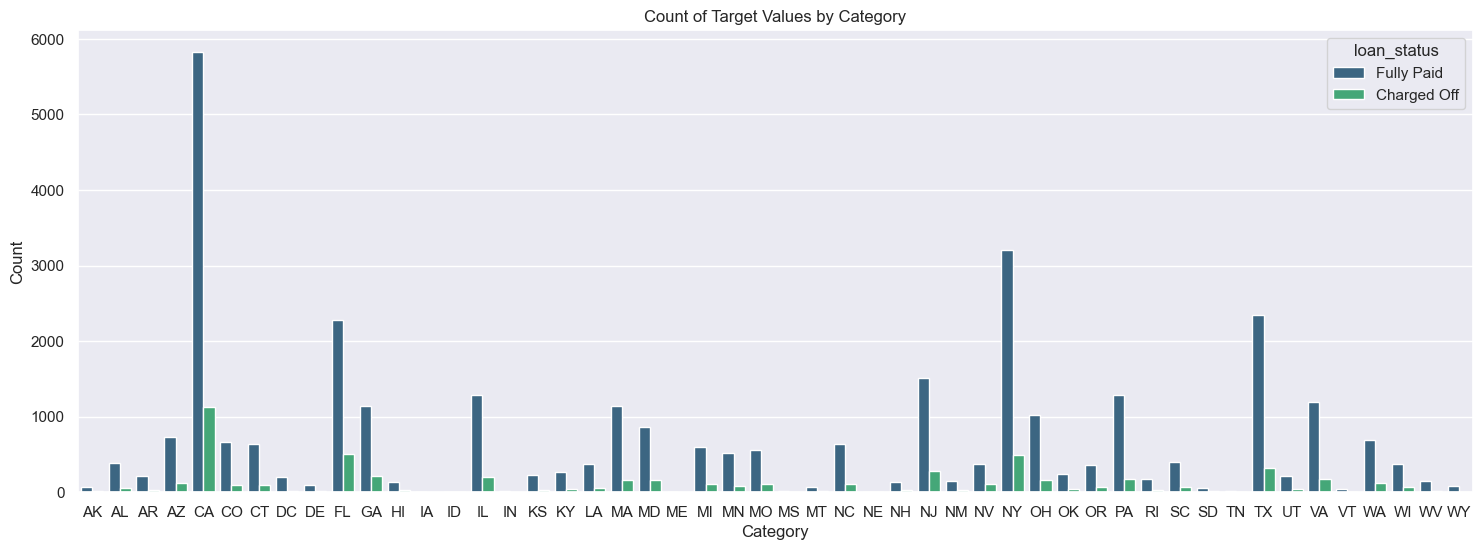

In [176]:
plt.figure(figsize=(18, 6))
sns.countplot(x=loan_df['addr_state'], hue=target_variable[0], data=loan_df, palette='viridis')
plt.title('Count of Target Values by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()


Based on the graph below, CA category has more number of borrowers. Although, there are agreeable number of Fully paid candidates,
There are plenty of defaulters from the same category
There maybe various reasons to have borrowers from this category -> 1. High cost of living in the demographical place, 2. High need of expenditure

# Heatmap

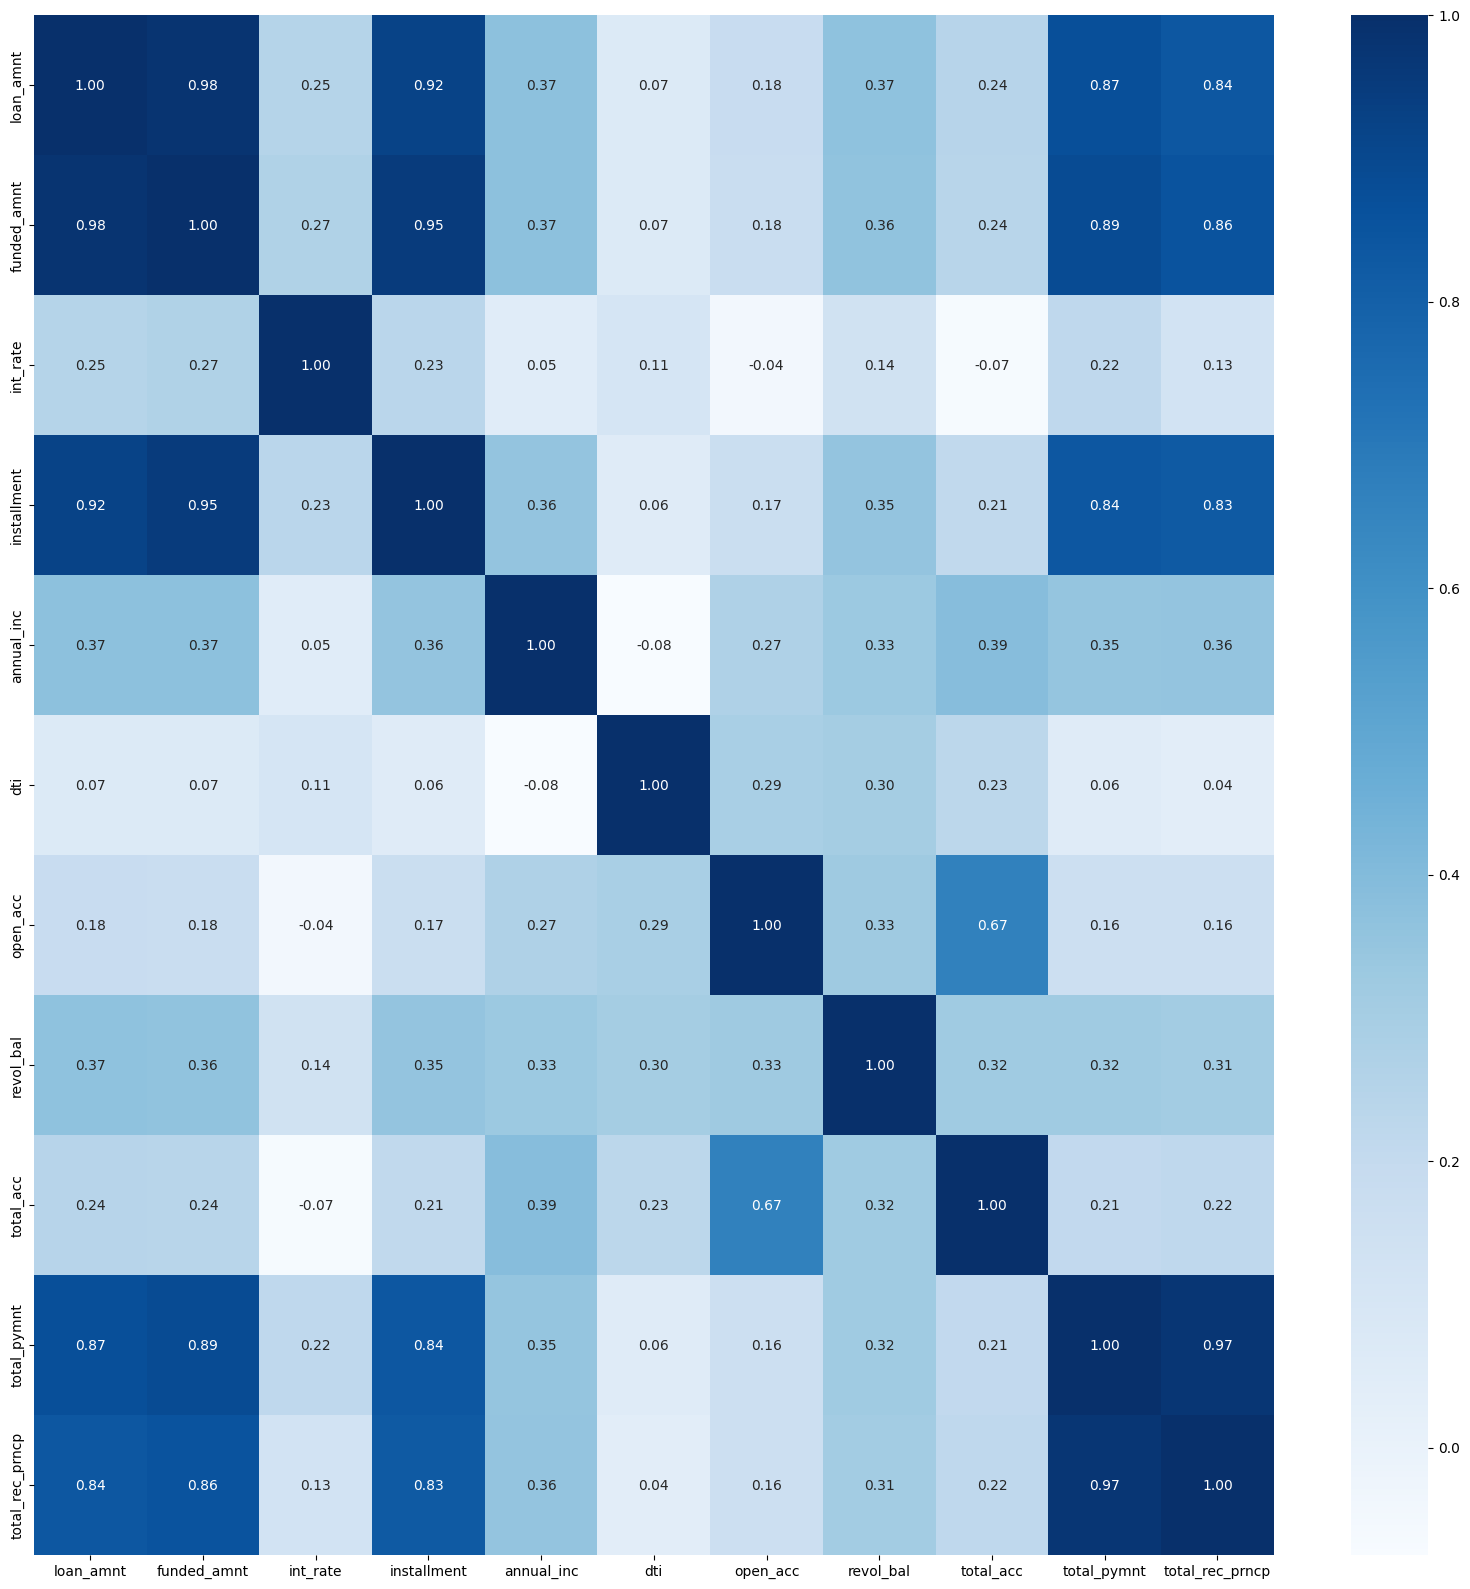

In [26]:
new_target_column = ['loan_status_converted']
plt.figure(figsize=(20, 20))  # Set the figure size

heatmap = sns.heatmap(loan_df [num_cols_new ].corr(), fmt='0.2f', cmap="Blues", annot=True)
plt.show()

Loan amount and funded amount are highly correlated which indicates that loan_amount borrowed by the borrower and funded by the lender are almost similar or in propotion. 
total_payment and total_rec_prncp are  highly correlated which indicates that total_payment made will be higher for higher Principal received till date. Total_payment made by the borrower also leads       
loan_amnt and installements are highly correlated which means higher the loan amount higher the installement.
Loan amount, installement and total payment are highly correlated which indicates higer the loan taken, more number of installements would be made to repay the loan and accordingly total payment will also be high.

Loan amount and interest rate are not highly correlated which indicates that the interest rate would depend on how the bank or market is performing irrespective of the loan amount issued.

Total account and open account are not highly correlated to loan amount which indicates that the amount of loan taken or issued does not consider how many accounts customer has or opened.